## Lead Score Case Study 
#### Problem Statement: 
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Goal
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Step 1: Importing 

In [1]:
#importing all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data and checing the top 5 rows
leads = pd.read_csv('Leads.csv')
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [3]:
#checking the shape
leads.shape

(9240, 37)

In [4]:
#checking the information
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#checking the summary
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## Step 2: Inspecting the Dataframe

In [6]:
#calculate % of null values in each columns
def null_values(apl):
    total = apl.isnull().sum().sort_values(ascending = False)
    percent = (apl.isnull().sum()/apl.isnull().count()*100).sort_values(ascending = False)
    missing_inp0  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_inp0

null_values(leads)

Total    Percent
Lead Quality                                    4767  51.590909
Asymmetrique Profile Score                      4218  45.649351
Asymmetrique Activity Score                     4218  45.649351
Asymmetrique Profile Index                      4218  45.649351
Asymmetrique Activity Index                     4218  45.649351
Tags                                            3353  36.287879
What matters most to you in choosing a course   2709  29.318182
Lead Profile                                    2709  29.318182
What is your current occupation                 2690  29.112554
Country                                         2461  26.634199
How did you hear about X Education              2207  23.885281
Specialization                                  1438  15.562771
City                                            1420  15.367965
TotalVisits                                      137   1.482684
Page Views Per Visit                             137   1.482684
Last Activity                                    103   1.114719
Lead Source                                       36   0.389610
Do Not Email                                       0   0.000000
Do Not Call                                        0   0.000000
Converted                                          0   0.000000
Total Time Spent on Website                        0   0.000000
Lead Origin                                        0   0.000000
Lead Number                                        0   0.000000
Last Notable Activity                              0   0.000000
Newspaper Article                                  0   0.000000
Search                                             0   0.000000
Magazine                                           0   0.000000
A free copy of Mastering The Interview             0   0.000000
X Education Forums                                 0   0.000000
Newspaper                                          0   0.000000
Digital Advertisement                              0   0.000000
Through Recommendations                            0   0.000000
Receive More Updates About Our Courses             0   0.000000
Update me on Supply Chain Content                  0   0.000000
Get updates on DM Content                          0   0.000000
I agree to pay the amount through cheque           0   0.000000
Prospect ID                                        0   0.000000

In [7]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Converting all the 'Select' into null values 

In [8]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [9]:
leads = leads.replace('Select',np.nan)

In [10]:
leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [11]:
leads['Specialization'].isnull().sum()

3380

In [12]:
#calculate % of null values in each columns again
def null_values(apl):
    total = apl.isnull().sum().sort_values(ascending = False)
    percent = (apl.isnull().sum()/apl.isnull().count()*100).sort_values(ascending = False)
    missing_inp0  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_inp0

null_values(leads)

Total    Percent
How did you hear about X Education              7250  78.463203
Lead Profile                                    6855  74.188312
Lead Quality                                    4767  51.590909
Asymmetrique Profile Score                      4218  45.649351
Asymmetrique Activity Score                     4218  45.649351
Asymmetrique Profile Index                      4218  45.649351
Asymmetrique Activity Index                     4218  45.649351
City                                            3669  39.707792
Specialization                                  3380  36.580087
Tags                                            3353  36.287879
What matters most to you in choosing a course   2709  29.318182
What is your current occupation                 2690  29.112554
Country                                         2461  26.634199
TotalVisits                                      137   1.482684
Page Views Per Visit                             137   1.482684
Last Activity                                    103   1.114719
Lead Source                                       36   0.389610
Lead Origin                                        0   0.000000
Lead Number                                        0   0.000000
Do Not Email                                       0   0.000000
Do Not Call                                        0   0.000000
Converted                                          0   0.000000
Total Time Spent on Website                        0   0.000000
Last Notable Activity                              0   0.000000
Newspaper Article                                  0   0.000000
Search                                             0   0.000000
Magazine                                           0   0.000000
A free copy of Mastering The Interview             0   0.000000
X Education Forums                                 0   0.000000
Newspaper                                          0   0.000000
Digital Advertisement                              0   0.000000
Through Recommendations                            0   0.000000
Receive More Updates About Our Courses             0   0.000000
Update me on Supply Chain Content                  0   0.000000
Get updates on DM Content                          0   0.000000
I agree to pay the amount through cheque           0   0.000000
Prospect ID                                        0   0.000000

We can see that some variables have more than 30% of the entries null. So we can remove all the variables who's null value is more than or equal to 30%.
Variables having values null values less than 30%, we can try and impute those values

In [13]:
# putting the defined funtion in leads data and appending the values in a new table
missing_values_leads = null_values(leads)
missing_values_leads

Total    Percent
How did you hear about X Education              7250  78.463203
Lead Profile                                    6855  74.188312
Lead Quality                                    4767  51.590909
Asymmetrique Profile Score                      4218  45.649351
Asymmetrique Activity Score                     4218  45.649351
Asymmetrique Profile Index                      4218  45.649351
Asymmetrique Activity Index                     4218  45.649351
City                                            3669  39.707792
Specialization                                  3380  36.580087
Tags                                            3353  36.287879
What matters most to you in choosing a course   2709  29.318182
What is your current occupation                 2690  29.112554
Country                                         2461  26.634199
TotalVisits                                      137   1.482684
Page Views Per Visit                             137   1.482684
Last Activity                                    103   1.114719
Lead Source                                       36   0.389610
Lead Origin                                        0   0.000000
Lead Number                                        0   0.000000
Do Not Email                                       0   0.000000
Do Not Call                                        0   0.000000
Converted                                          0   0.000000
Total Time Spent on Website                        0   0.000000
Last Notable Activity                              0   0.000000
Newspaper Article                                  0   0.000000
Search                                             0   0.000000
Magazine                                           0   0.000000
A free copy of Mastering The Interview             0   0.000000
X Education Forums                                 0   0.000000
Newspaper                                          0   0.000000
Digital Advertisement                              0   0.000000
Through Recommendations                            0   0.000000
Receive More Updates About Our Courses             0   0.000000
Update me on Supply Chain Content                  0   0.000000
Get updates on DM Content                          0   0.000000
I agree to pay the amount through cheque           0   0.000000
Prospect ID                                        0   0.000000

In [14]:
leads2 = leads.copy()

In [15]:
# droping all the coloumns with more than 30% of null values
nullCol = list(missing_values_leads[missing_values_leads.Percent>=30.00].index)
leads2=leads.drop(labels=nullCol,axis=1)

In [16]:
leads2.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ... X Education Forums  \
0                            0                   0.0  ...                 No   
1                          674                   2.5  ...                 No   
2                         1532                   2.0  ...                 No   
3                          305                   1.0  ...                 No   
4                         1428                   1.0  ...                 No   

  Newspaper Digital Advertisement Through Recommendations  \
0        No                    No                      No   
1        No                    No                      No   
2        No                    No                      No   
3        No                    No                      No   
4        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   
2                        No                                       No   
3                        No                                       No   
4                        No                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 27 columns]

In [17]:
leads2.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9103.000000  
mean               2.362820  
std                2.161418  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

In [18]:
leads2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Lets look at `What matters most to you in choosing a course` 

In [19]:
#lets look at 'What matters most to you in choosing a course' variable
leads2["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

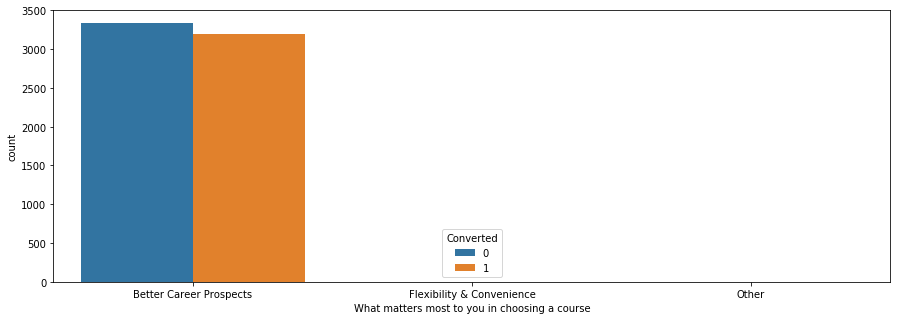

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(leads2["What matters most to you in choosing a course"],hue=leads2.Converted)
plt.show()

since `What matters most to you in choosing a course` variable is catagorical variable. We can not choose mean or median. So we have to go with mode. So highest mode is for 'Better Career Prospects'. So we will impute all the null values in this variable with 'Better Career Prospects' as it already have the highest selection.

In [21]:
leads2.loc[leads2["What matters most to you in choosing a course"].isnull(),"What matters most to you in choosing a course"]="Better Career Prospects"

In [22]:
leads2["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Lets look at `What is your current occupation` 

In [23]:
#lets look at 'What is your current occupation' variable
leads2["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

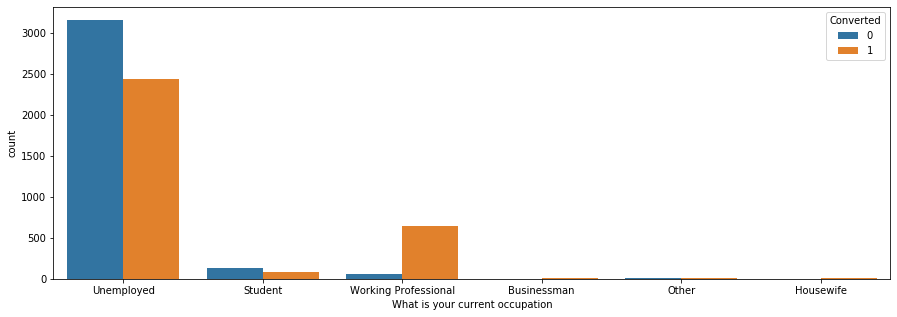

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(leads2["What is your current occupation"],hue=leads2.Converted)
plt.show()

since `What is your current occupation` variable is catagorical variable. We can not choose mean or median. So we have to go with mode. So highest mode is for 'Unemployed'. So we will impute all the null values in this variable with 'Unemployed' as it already have the highest selection.

In [25]:
leads2.loc[leads2["What is your current occupation"].isnull(),"What is your current occupation"]="Unemployed"

In [26]:
leads2["What is your current occupation"].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Lets look at `Country` 

In [27]:
#lets look at 'Country' variable
leads2["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Nigeria                    4
South Africa               4
Germany                    4
Canada                     4
Sweden                     3
Netherlands                2
Uganda                     2
Ghana                      2
Italy                      2
Philippines                2
China                      2
Bangladesh                 2
Asia/Pacific Region        2
Belgium                    2
Switzerland                1
Sri Lanka                  1
Denmark                    1
Kenya                      1
Liberia                    1
Malaysia                   1
Vietnam       

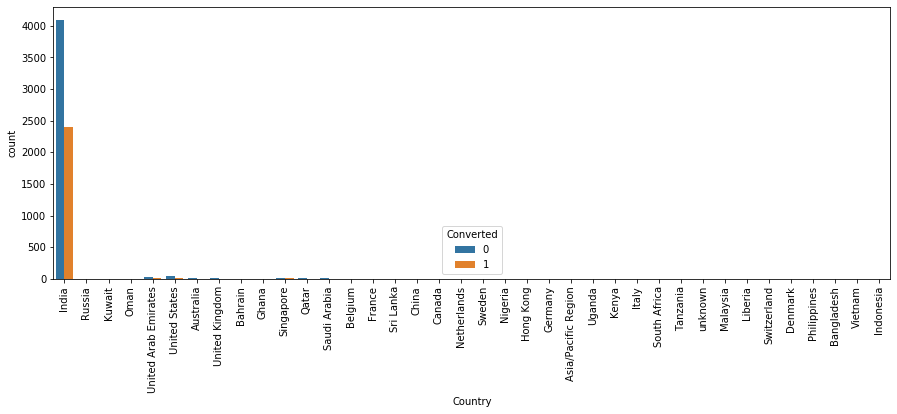

In [28]:
plt.figure(figsize=(15,5))
s = sns.countplot(leads2["Country"],hue=leads2.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

since `Country` variable is catagorical variable. We can not choose mean or median. So we have to go with mode. So highest mode is for 'India'. So we will impute all the null values in this variable with 'India' as it already have the highest selection.

In [29]:
leads2.loc[leads2["Country"].isnull(),"Country"]="India"

In [30]:
leads2["Country"].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Nigeria                    4
South Africa               4
Germany                    4
Canada                     4
Sweden                     3
Netherlands                2
Uganda                     2
Ghana                      2
Italy                      2
Philippines                2
China                      2
Bangladesh                 2
Asia/Pacific Region        2
Belgium                    2
Switzerland                1
Sri Lanka                  1
Denmark                    1
Kenya                      1
Liberia                    1
Malaysia                   1
Vietnam       

#### Lets look at `TotalVisits` 

In [31]:
#lets look at 'TotalVisits' variable
leads2["TotalVisits"].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

since `TotalVisits` variable is numerical variable. We can go with either mean or median. 

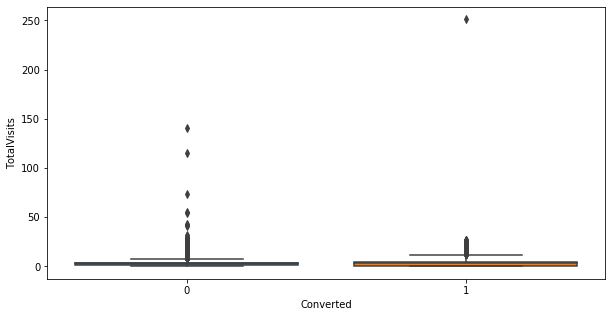

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(y = "TotalVisits",x="Converted",data=leads2)
plt.show()

Lets look at the outliers first

In [33]:
leads2["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [34]:
a = leads2[["TotalVisits",'Converted']]
a

TotalVisits  Converted
0             0.0          0
1             5.0          0
2             2.0          1
3             1.0          0
4             2.0          1
...           ...        ...
9235          8.0          1
9236          2.0          0
9237          2.0          0
9238          3.0          1
9239          6.0          1

[9240 rows x 2 columns]

In [35]:
a[a.Converted==1].value_counts()

TotalVisits  Converted
0.0          1            916
2.0          1            537
3.0          1            486
4.0          1            448
5.0          1            316
6.0          1            178
7.0          1            122
8.0          1            103
9.0          1             73
1.0          1             60
10.0         1             57
11.0         1             48
13.0         1             23
14.0         1             21
12.0         1             18
16.0         1             10
15.0         1              7
18.0         1              6
19.0         1              6
21.0         1              5
20.0         1              4
24.0         1              4
27.0         1              3
23.0         1              3
17.0         1              2
26.0         1              2
22.0         1              1
25.0         1              1
251.0        1              1
dtype: int64

In [36]:
a[(a.Converted==1) & (a.TotalVisits>20)]

TotalVisits  Converted
345          21.0          1
663          21.0          1
2154         23.0          1
2289         21.0          1
3315         24.0          1
5026         26.0          1
5078         21.0          1
5349         24.0          1
5723         21.0          1
5746         22.0          1
6102        251.0          1
6182         24.0          1
6702         26.0          1
6805         24.0          1
7421         27.0          1
7537         27.0          1
7547         23.0          1
8624         27.0          1
8684         23.0          1
9016         25.0          1

We can see that even when `TotalVisits` is at its maximum i.e. 251.0, that lead gets converted. So we can not remove these outliers

We will impute median instead of mean as the mean value is greater than mean. So imputing all the null values with median value i.e. 3.0.

In [37]:
leads2.loc[leads2["TotalVisits"].isnull(),"TotalVisits"]=3.0

In [38]:
leads2["TotalVisits"].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### Lets look at `Page Views Per Visit` 

In [39]:
leads2['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

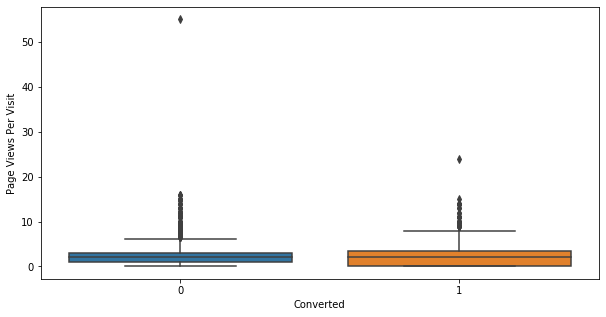

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(y= leads2['Page Views Per Visit'], x=leads2["Converted"])
plt.show()

Lets look at the outliers first

In [41]:
b=leads2[['Page Views Per Visit','Converted']]
b.groupby(['Converted']).count()

Page Views Per Visit
Converted                      
0                          5642
1                          3461

In [42]:
b[(b['Page Views Per Visit']>20) & (b['Converted']==1)]

Page Views Per Visit  Converted
6805                  24.0          1

We can see that a lead that has `page views per visit` equal to 24 gets converted. So we can not remove outliers. We will impute all the null values with median value i.e 2.0 as median is greater than mean

In [43]:
leads2.loc[leads2["Page Views Per Visit"].isnull(),"Page Views Per Visit"]=2.0

In [44]:
leads2["Page Views Per Visit"].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

#### Lets look at `Last Activity` 

In [45]:
leads2["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

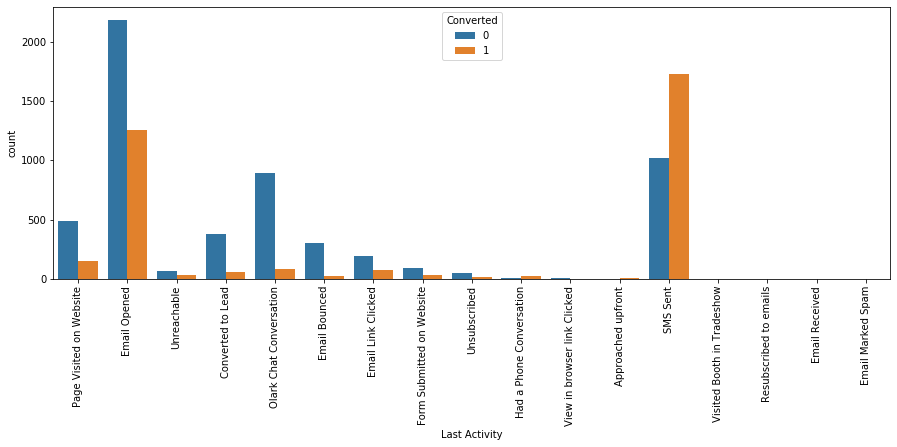

In [46]:
plt.figure(figsize=(15,5))
s = sns.countplot(leads2["Last Activity"],hue=leads2.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

since `Last Activity` variable is catagorical variable. We can not choose mean or median. So we have to go with mode. So highest mode is for 'SMS Sent'. Since 'SMS Sent' has the highest number of conversion. So we will impute all the null values in this variable with 'SMS Sent'.

In [47]:
leads2.loc[leads2["Last Activity"].isnull(),"Last Activity"]="SMS Sent"

In [48]:
leads2["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2848
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### Lets look at `Lead Source` 

In [49]:
leads2["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
youtubechannel          1
WeLearn                 1
blog                    1
Pay per Click Ads       1
NC_EDM                  1
welearnblog_Home        1
testone                 1
Name: Lead Source, dtype: int64

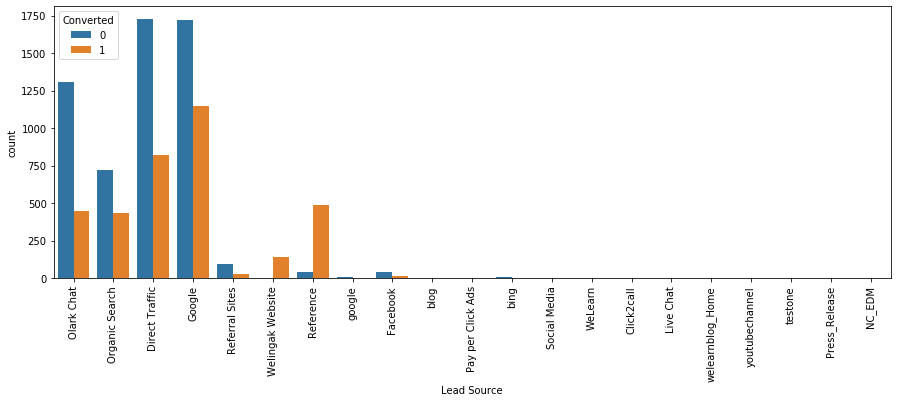

In [50]:
plt.figure(figsize=(15,5))
s = sns.countplot(leads2["Lead Source"],hue=leads2.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

since `Lead Source` variable is catagorical variable. We can not choose mean or median. So we have to go with mode. So highest mode is for 'Google'. So we will impute all the null values in this variable with 'Google' as it already have the highest selection.

In [51]:
leads2.loc[leads2["Lead Source"].isnull(),"Lead Source"]="Google"

In [52]:
leads2["Lead Source"].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
youtubechannel          1
WeLearn                 1
blog                    1
Pay per Click Ads       1
NC_EDM                  1
welearnblog_Home        1
testone                 1
Name: Lead Source, dtype: int64

#### Checking the null values again

In [53]:
#calculate % of null values in each columns again
def null_values(apl):
    total = apl.isnull().sum().sort_values(ascending = False)
    percent = (apl.isnull().sum()/apl.isnull().count()*100).sort_values(ascending = False)
    missing_inp0  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_inp0

null_values(leads2)

Total  Percent
Last Notable Activity                              0      0.0
What is your current occupation                    0      0.0
Lead Number                                        0      0.0
Lead Origin                                        0      0.0
Lead Source                                        0      0.0
Do Not Email                                       0      0.0
Do Not Call                                        0      0.0
Converted                                          0      0.0
TotalVisits                                        0      0.0
Total Time Spent on Website                        0      0.0
Page Views Per Visit                               0      0.0
Last Activity                                      0      0.0
Country                                            0      0.0
What matters most to you in choosing a course      0      0.0
A free copy of Mastering The Interview             0      0.0
Search                                             0      0.0
Magazine                                           0      0.0
Newspaper Article                                  0      0.0
X Education Forums                                 0      0.0
Newspaper                                          0      0.0
Digital Advertisement                              0      0.0
Through Recommendations                            0      0.0
Receive More Updates About Our Courses             0      0.0
Update me on Supply Chain Content                  0      0.0
Get updates on DM Content                          0      0.0
I agree to pay the amount through cheque           0      0.0
Prospect ID                                        0      0.0

## Step 3: Data Preparation

In [54]:
#Checking the top5 rows of the data
leads2.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ... X Education Forums  \
0                            0                   0.0  ...                 No   
1                          674                   2.5  ...                 No   
2                         1532                   2.0  ...                 No   
3                          305                   1.0  ...                 No   
4                         1428                   1.0  ...                 No   

  Newspaper Digital Advertisement Through Recommendations  \
0        No                    No                      No   
1        No                    No                      No   
2        No                    No                      No   
3        No                    No                      No   
4        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   
2                        No                                       No   
3                        No                                       No   
4                        No                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 27 columns]

In [55]:
#Checking the shape
leads2.shape

(9240, 27)

In [56]:
#Converted Rate
Converted = (sum(leads2["Converted"])/len(leads2["Converted"].index))*100
Converted

38.53896103896104

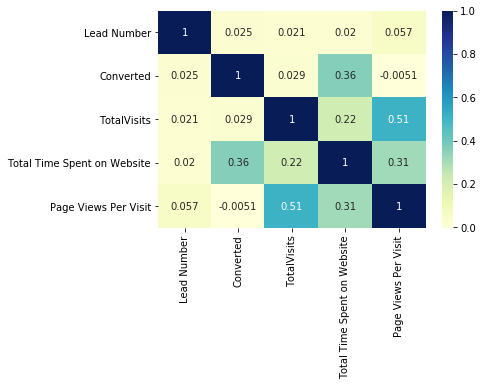

In [57]:
#heatmap
sns.heatmap(leads2.corr(),cmap="YlGnBu",annot=True)
plt.show()

#### Converting some binary variables (Yes/No) to 0/1

In [58]:
#columns in the leads2 dataframe
leads2.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [59]:
#all required variables
varlist = ['Do Not Email','Do Not Call','Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper',
           'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses',
           'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the leads list
leads2[varlist] = leads2[varlist].apply(binary_map)

In [60]:
#head of lead2 again
leads2.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ... X Education Forums  \
0                            0                   0.0  ...                  0   
1                          674                   2.5  ...                  0   
2                         1532                   2.0  ...                  0   
3                          305                   1.0  ...                  0   
4                         1428                   1.0  ...                  0   

  Newspaper Digital Advertisement Through Recommendations  \
0         0                     0                       0   
1         0                     0                       0   
2         0                     0                       0   
3         0                     0                       0   
4         0                     0                       0   

   Receive More Updates About Our Courses  Update me on Supply Chain Content  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   

   Get updates on DM Content  I agree to pay the amount through cheque  \
0                          0                                         0   
1                          0                                         0   
2                          0                                         0   
3                          0                                         0   
4                          0                                         0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  
2                                       1           Email Opened  
3                                       0               Modified  
4                                       0               Modified  

[5 rows x 27 columns]

In [62]:
#checking the shape again
leads2.shape

(9240, 27)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [63]:
#checking information
leads2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [64]:
#converting lead number into object from int64
leads2['Lead Number']=leads2['Lead Number'].astype('object')

In [65]:
#all the categorical variable
cata_var = leads2.select_dtypes(exclude=['int64','float64'])
cata_var.head()

Prospect ID Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620      660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482      660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a      660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc      660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852      660681  Landing Page Submission   

      Lead Source            Last Activity Country  \
0      Olark Chat  Page Visited on Website   India   
1  Organic Search             Email Opened   India   
2  Direct Traffic             Email Opened   India   
3  Direct Traffic              Unreachable   India   
4          Google        Converted to Lead   India   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Last Notable Activity  
0                       Better Career Prospects              Modified  
1                       Better Career Prospects          Email Opened  
2                       Better Career Prospects          Email Opened  
3                       Better Career Prospects              Modified  
4                       Better Career Prospects              Modified

In [66]:
#droping 'Prospect ID','Lead Number' from cata_var as they are unique categories
cata_var.drop(['Prospect ID','Lead Number','Country'],axis=1,inplace=True)

In [67]:
#checking columns in cata_var
cata_var.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

In [68]:
#creating dummy variables of all categorical variables excluding Country
dummy_var = pd.get_dummies(cata_var[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
       'What matters most to you in choosing a course','Last Notable Activity']],drop_first=True)

#concatinating dummy variables to leads2
leads2 = pd.concat([leads2,dummy_var],axis=1)

In [69]:
#checking head again
leads2.head()

Prospect ID Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620      660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482      660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a      660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc      660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852      660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Last Notable Activity_Form Submitted on Website  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_Modified  \
0                              1   
1                              0   
2                              0   
3                              1   
4                              1   

  Last Notable Activity_Olark Chat Conversation  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4          

In [70]:
#checking shape again
leads2.shape

(9240, 89)

#### Dropping the repeated variables

In [77]:
#droping the related variables
leads2.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],axis=1,inplace=True)

KeyError: "['Lead Origin' 'Lead Source' 'Last Activity'\n 'What is your current occupation'\n 'What matters most to you in choosing a course' 'Last Notable Activity'] not found in axis"

In [72]:
leads2.head()

Prospect ID Lead Number  Do Not Email  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620      660737             0   
1  2a272436-5132-4136-86fa-dcc88c88f482      660728             0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a      660727             0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc      660719             0   
4  3256f628-e534-4826-9d63-4a8b88782852      660681             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit Country  Search  ...  \
0                   0.0   India       0  ...   
1                   2.5   India       0  ...   
2                   2.0   India       0  ...   
3                   1.0   India       0  ...   
4                   1.0   India       0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

[5 rows x 83 columns]

In [73]:
leads2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 83 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Prospect ID                                                              9240 non-null   object 
 1   Lead Number                                                              9240 non-null   object 
 2   Do Not Email                                                             9240 non-null   int64  
 3   Do Not Call                                                              9240 non-null   int64  
 4   Converted                                                                9240 non-null   int64  
 5   TotalVisits                                                              9240 non-null   float64
 6   Total Time Spent on Website                                             

## Step 4: Test-Train Split

In [78]:
# Putting feature variable to X
X = leads2.drop(['Prospect ID','Lead Number','Converted','Country'],axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Magazine  Newspaper Article  \
0                   0.0       0         0                  0   
1                   2.5       0         0                  0   
2                   2.0       0         0                  0   
3                   1.0       0         0                  0   
4                   1.0       0         0                  0   

   X Education Forums  Newspaper  ...  \
0                   0          0  ...   
1                   0          0  ...   
2                   0          0  ...   
3                   0          0  ...   
4                   0          0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

[5 rows x 79 columns]

In [79]:
# Putting response variable to y
y = leads2['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [80]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Feature Scaling

In [81]:
#scaling
scaler = StandardScaler()

#scaling the requred variables
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1871             0            0    -0.656434                    -0.885371   
6795             0            0     0.100767                     0.005716   
3516             0            0     0.290067                    -0.691418   
8105             0            0     0.290067                     1.365219   
3934             0            0    -0.656434                    -0.885371   

      Page Views Per Visit  Search  Magazine  Newspaper Article  \
1871             -1.085519       0         0                  0   
6795             -0.470569       0         0                  0   
3516              0.070401       0         0                  0   
8105              1.226321       0         0                  0   
3934             -1.085519       0         0                  0   

      X Education Forums  Newspaper  ...  \
1871                   0          0  ...   
6795                   0          0  ...   
3516                   0          0  ...   
8105                   0          0  ...   
3934                   0          0  ...   

      Last Notable Activity_Form Submitted on Website  \
1871                                                0   
6795                                                0   
3516                                                0   
8105                                                0   
3934                                                0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Resubscribed to emails  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516                               0                                  0   
8105                               1                                  0   
3934                               0                                  0   

      Last Notable Activity_Unsubscribed  \
1871                                   0   
6795                                   0   
3516                                   0   
8105                                   0   
3934                                   0   

      Last Notable Activity_View in browser link Clicked  
1871                                                  0   
6795                                                  0   
3516                                                  0   
8105           

In [82]:
# Checking the Converted Rate
conver = 100*(sum(leads2['Converted'])/len(leads2['Converted'].index))
conver

38.53896103896104

We have almost 39% of converted rate right now

## Step 6: Looking at Correlations

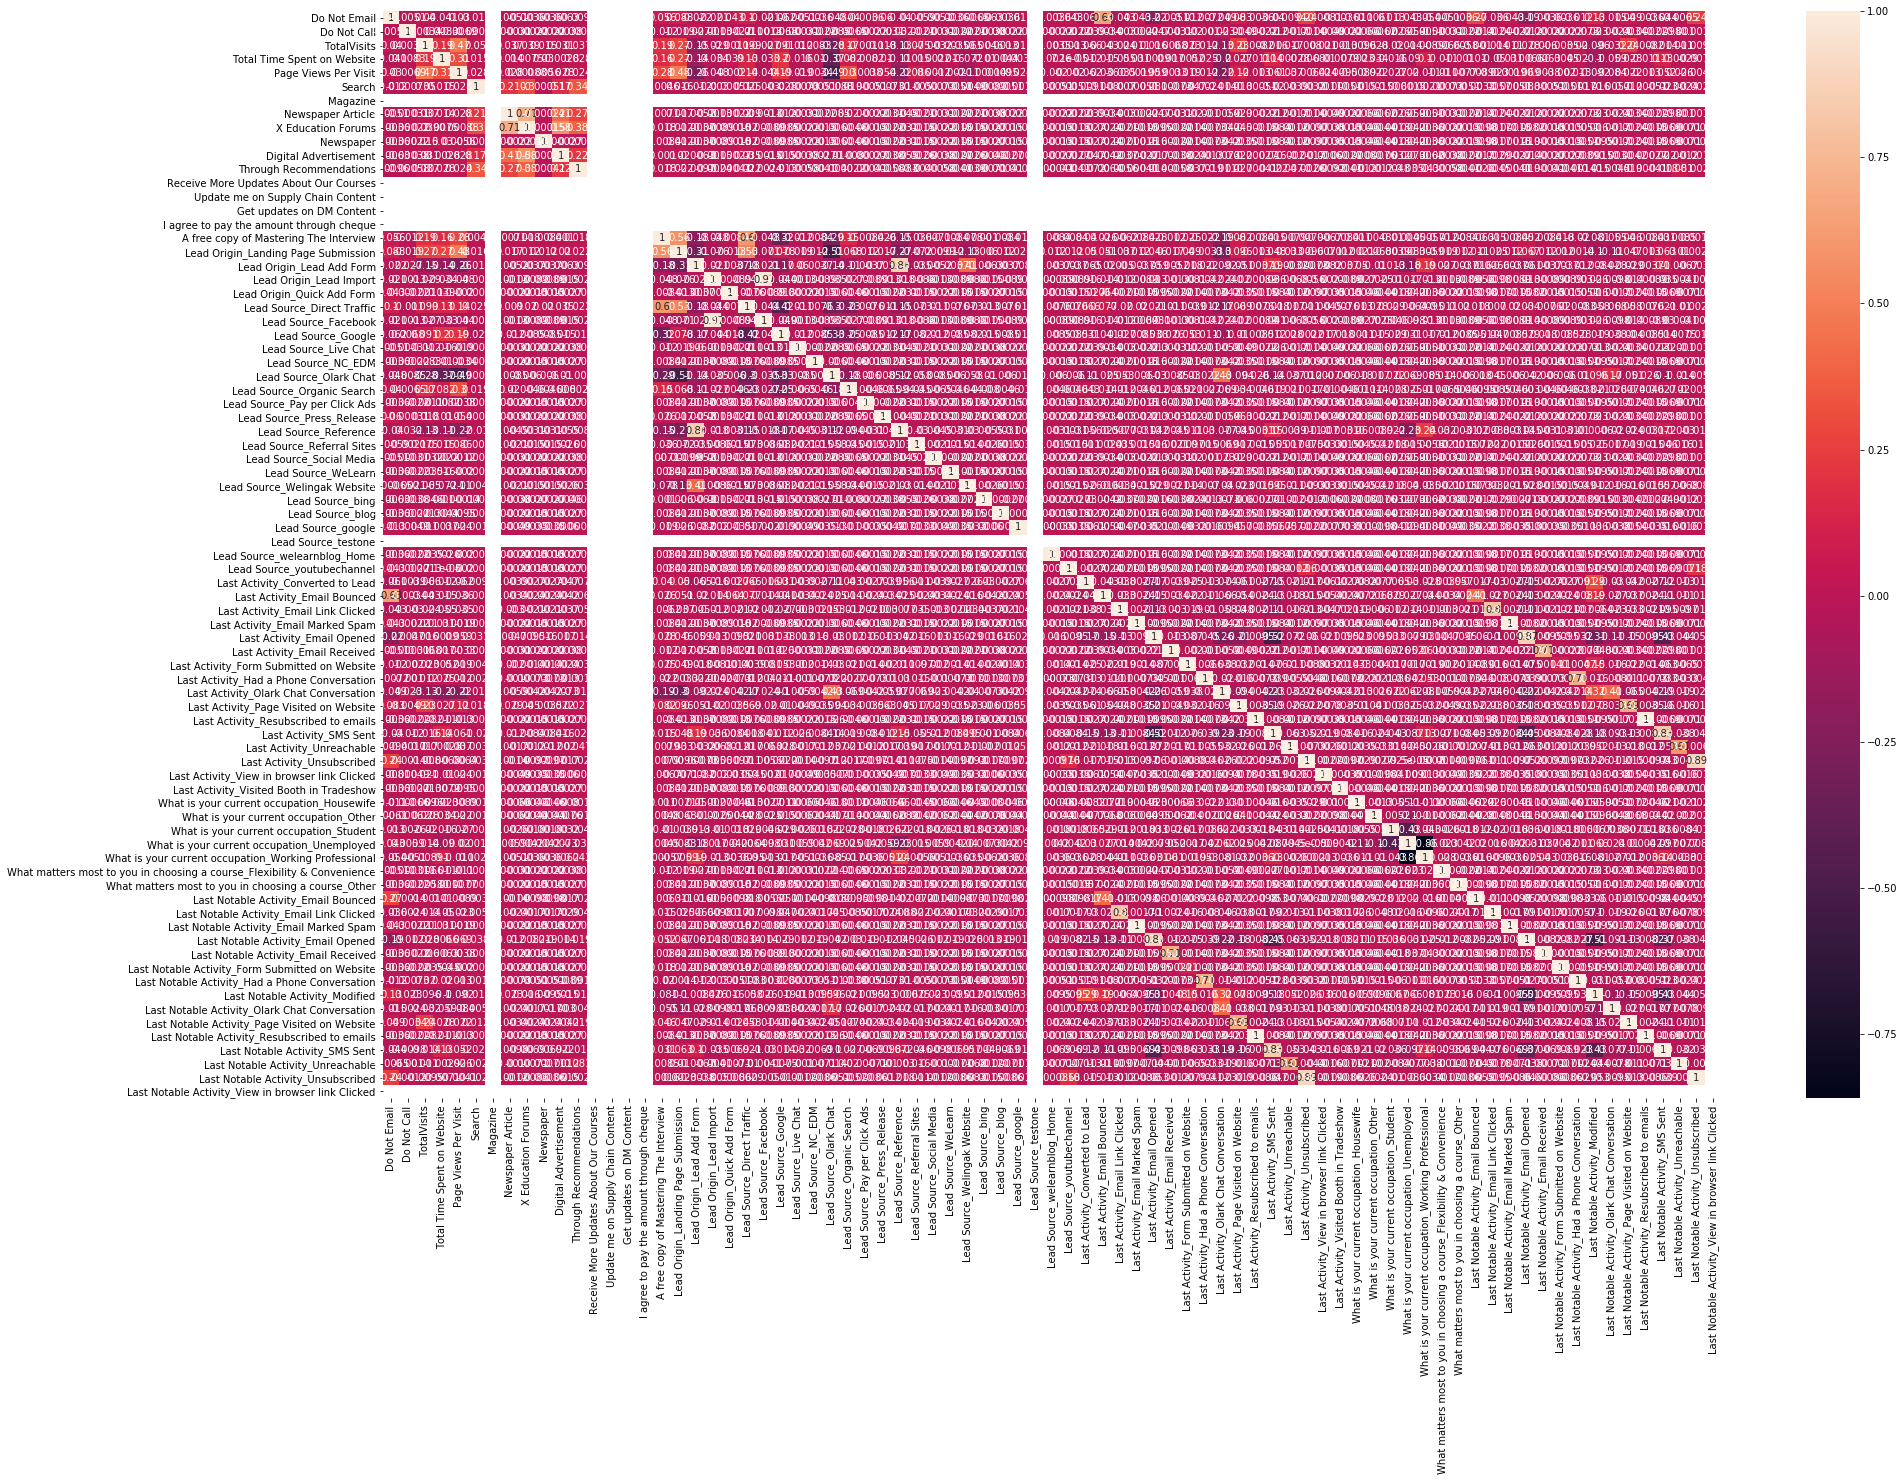

In [83]:
#heat map
plt.figure(figsize=(30,20))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [84]:
X_train.corr()[['Receive More Updates About Our Courses', 'I agree to pay the amount through cheque', 'Magazine', 
                'Get updates on DM Content', 'Lead Source_testone', 'Update me on Supply Chain Content',
                'Last Notable Activity_View in browser link Clicked']]


Receive More Updates About Our Courses  \
Do Not Email                                                                           NaN   
Do Not Call                                                                            NaN   
TotalVisits                                                                            NaN   
Total Time Spent on Website                                                            NaN   
Page Views Per Visit                                                                   NaN   
...                                                                                    ...   
Last Notable Activity_Resubscribed to emails                                           NaN   
Last Notable Activity_SMS Sent                                                         NaN   
Last Notable Activity_Unreachable                                                      NaN   
Last Notable Activity_Unsubscribed                                                     NaN   
Last Notable Activity_View in browser link Clicked                                     NaN   

                                                    I agree to pay the amount through cheque  \
Do Not Email                                                                             NaN   
Do Not Call                                                                              NaN   
TotalVisits                                                                              NaN   
Total Time Spent on Website                                                              NaN   
Page Views Per Visit                                                                     NaN   
...                                                                                      ...   
Last Notable Activity_Resubscribed to emails                                             NaN   
Last Notable Activity_SMS Sent                                                           NaN   
Last Notable Activity_Unreachable                                                        NaN   
Last Notable Activity_Unsubscribed                                                       NaN   
Last Notable Activity_View in browser link Clicked                                       NaN   

                                                    Magazine  \
Do Not Email                                             NaN   
Do Not Call                                              NaN   
TotalVisits                                              NaN   
Total Time Spent on Website                              NaN   
Page Views Per Visit                                     NaN   
...                                                      ...   
Last Notable Activity_Resubscribed to emails             NaN   
Last Notable Activity_SMS Sent                           NaN   
Last Notable Activity_Unreachable                        NaN   
Last Notable Activity_Unsubscribed                       NaN   
Last Notable Activity_View in browser link Clicked       NaN   

                                                    Get updates on DM Content  \
Do Not Email                                                              NaN   
Do Not Call                                                               NaN   
TotalVisits                                                               NaN   
Total Time Spent on Website                                               NaN   
Page Views Per Visit                                                      NaN   
...                                                                       ...   
Last Notable Activity_Resubscribed to emails                              NaN   
Last Notable Activity_SMS Sent                                            NaN   
Last Notable Activity_Unreachable                                         NaN   
Last Notable Activity_Unsubscribed                                        NaN   
Last Notable Activity_View in browser link Clicked                        NaN   

                            

In [85]:
#Droping these non related variables
X_train.drop(['Receive More Updates About Our Courses', 'I agree to pay the amount through cheque', 'Magazine', 
                'Get updates on DM Content', 'Lead Source_testone', 'Update me on Supply Chain Content',
                'Last Notable Activity_View in browser link Clicked'],axis=1,inplace=True)

X_test.drop(['Receive More Updates About Our Courses', 'I agree to pay the amount through cheque', 'Magazine', 
                'Get updates on DM Content', 'Lead Source_testone', 'Update me on Supply Chain Content',
                'Last Notable Activity_View in browser link Clicked'],axis=1,inplace=True)

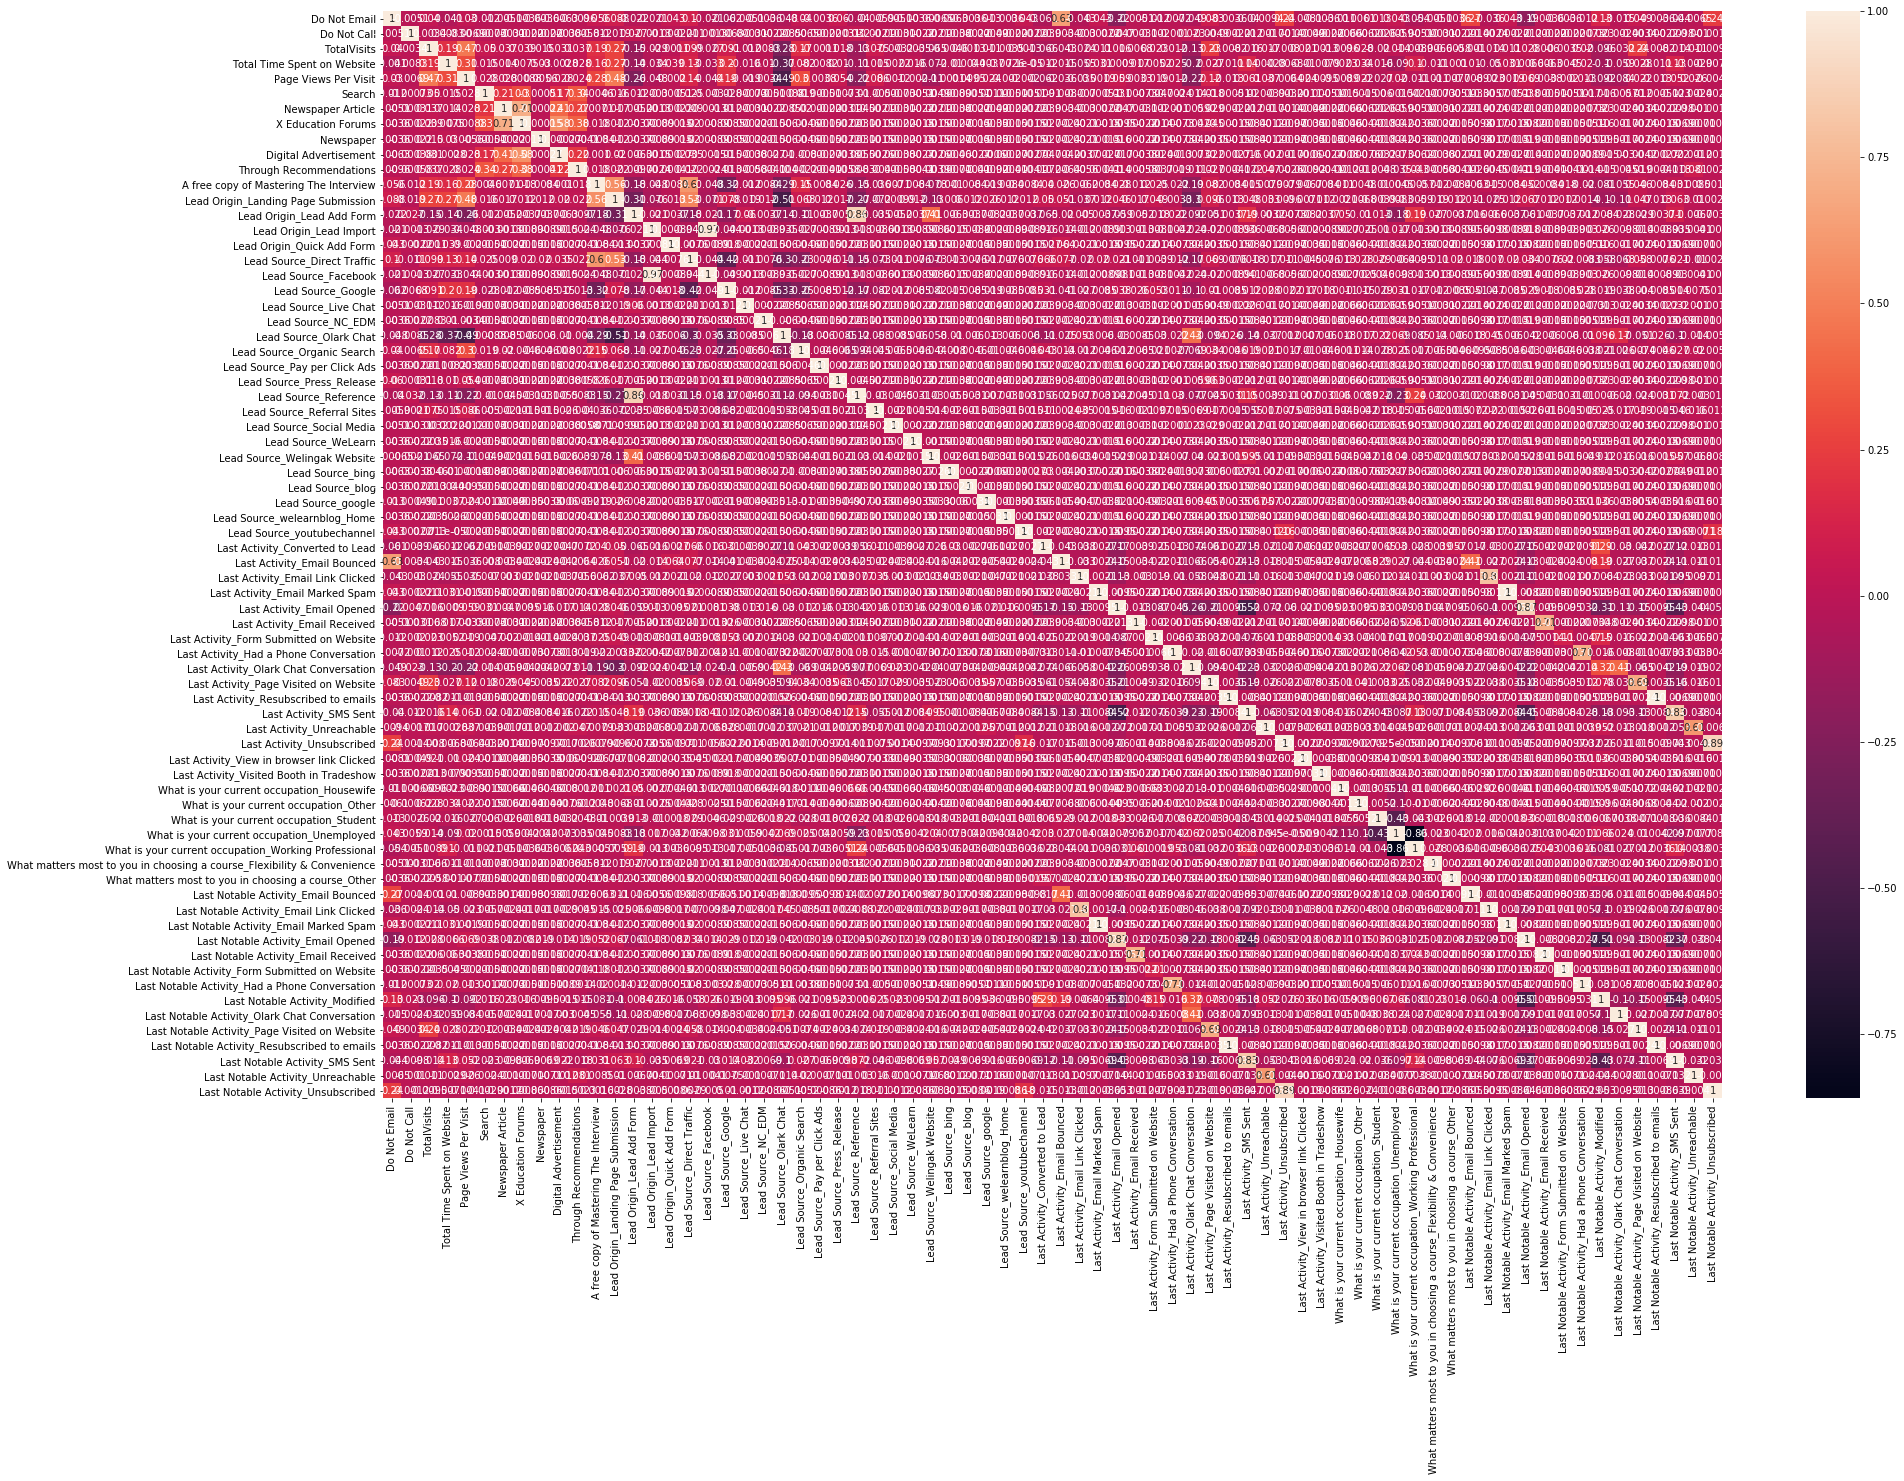

In [86]:
#heatmap again
plt.figure(figsize=(30,20))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

## Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [87]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6398
Model Family:                Binomial   Df Model:                           69
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 09 Jan 2021   Deviance:                          nan
Time:                        14:12:50   Pearson chi2:                 7.22e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    5.219e+15   5.24e+07   9.95e+07      0.000    5.22e+15    5.22e+15
Do Not Email                                                            -7.266e+14   4.42e+06  -1.64e+08      0.000   -7.27e+14   -7.27e+14
Do Not Call                                                              6.263e+15   4.76e+07   1.32e+08      0.000    6.26e+15    6.26e+15
TotalVisits                                                              8.878e+13   9.89e+05   8.98e+07      0.000    8.88e+13    8.88e+13
Total Time Spent on Website                                              2.791e+13   9.47e+05   2.95e+07      0.000    2.79e+13    2.79e+13
Page Views Per Visit                                                    -7.253e+13    1.1e+06  -6.59e+07      0.000   -7.25e+13   -7.25e+13
Search                                                                  -4.191e+14    2.2e+07   -1.9e+07      0.000   -4.19e+14   -4.19e+14
Newspaper Article                                                        5.666e+15   6.73e+07   8.42e+07      0.000    5.67e+15    5.67e+15
X Education Forums                                                      -4.794e+15   1.11e+08  -4.32e+07      0.000   -4.79e+15   -4.79e+15
Newspaper                                                               -5.069e+15   6.72e+07  -7.54e+07      0.000   -5.07e+15   -5.07e+15
Digital Advertisement                                                   -5.003e+15   4.76e+07  -1.05e+08      0.000      -5e+15      -5e+15
Through Recommendations                                                   1.75e+14   2.85e+07   6.13e+06      0.000    1.75e+14    1.75e+14
A free copy of Mastering The Interview                                    4.94e+13   2.52e+06   1.96e+07      0.000    4.94e+13    4.94e+13
Lead Origin_Landing Page Submission                                     -1.269e+14   2.65e+06  -4.79e+07      0.000   -1.27e+14   -1.27e+14
Lead Origin_Lead Add Form                                                3.655e+14    1.3e+07   2.82e+07      0.000    3.65e+14    3.65e+14
Lead Origin_Lead Import                                                 -6.799e+13    4.8e+07  -1.42e+06      0.000    -6.8e+13    -6.8e+13
Lead Origin_Quick Add Form                                               6.098e+15   6.74e+07   9.05e+07      0.000     6.1e+15     6.1e+15
Lead Source_Direct Traffic                                              -1.642e+15   4.09e+07  -4.01e+07      0.000   -1.64e+15   -1.64e+15
Lead Source_Facebook                                                    -2.325e+15    6.3e+07  -3.69e+07      0.000   -2.32e+15   -2.32e+15
Lea

## Step 8: Feature Selection Using RFE

In [88]:
logreg = LogisticRegression()

In [89]:
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [90]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False,  True,  True, False])

In [91]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 5),
 ('TotalVisits', False, 48),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 51),
 ('Search', False, 26),
 ('Newspaper Article', False, 27),
 ('X Education Forums', False, 41),
 ('Newspaper', False, 3),
 ('Digital Advertisement', False, 2),
 ('Through Recommendations', False, 23),
 ('A free copy of Mastering The Interview', False, 58),
 ('Lead Origin_Landing Page Submission', False, 40),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Origin_Quick Add Form', False, 21),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 30),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', False, 46),
 ('Lead Source_NC_EDM', False, 20),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Pay per Click Ads', False, 49),
 ('Lead Source_Press_Release', False, 39),
 ('Lead Source_Reference', False, 

In [92]:
col = X_train.columns[rfe.support_]

In [93]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       

##### Assessing the model with StatsModels

In [94]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2695.9
Date:                Sat, 09 Jan 2021   Deviance:                       5391.7
Time:                        14:13:00   Pearson chi2:                 7.48e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3827      0.052    -26.814      0.000      -1.484      -1.282
Do Not Email                                            -1.1259      0.190     -5.939      0.000      -1.497      -0.754
Total Time Spent on Website                              1.0945      0.039     27.888      0.000       1.018       1.171
Lead Origin_Lead Add Form                                3.6899      0.190     19.386      0.000       3.317       4.063
Lead Source_Olark Chat                                   1.1407      0.102     11.190      0.000       0.941       1.340
Lead Source_Welingak Website                             1.9267      0.743      2.595      0.009       0.471       3.382
Last Activity_Converted to Lead                         -1.2553      0.218     -5.760      0.000      -1.682      -0.828
Last Activity_Email Bounced                             -1.5582      0.422     -3.694      0.000      -2.385      -0.731
Last Activity_Had a Phone Conversation                   0.3881      0.944      0.411      0.681      -1.462       2.238
Last Activity_Olark Chat Conversation                   -1.3867      0.163     -8.520      0.000      -1.706      -1.068
What is your current occupation_Housewife               22.9380   1.37e+04      0.002      0.999   -2.68e+04    2.68e+04
What is your current occupation_Working Professional     2.7989      0.187     14.943      0.000       2.432       3.166
Last Notable Activity_Email Bounced                      1.8537      0.602      3.079      0.002       0.674       3.034
Last Notable Activity_Had a Phone Conversation           3.2110      1.447      2.218      0.027       0.374       6.048
Last Notable Activity_SMS Sent                           1.4616      0.079     18.545      0.000       1.307       1.616
Last Notable Activity_Unreachable                        1.7764      0.513      3.464      0.001       0.771       2.782
========================================================================================================================
"""

In [95]:
X_train_sm.head()

const  Do Not Email  Total Time Spent on Website  \
1871    1.0             0                    -0.885371   
6795    1.0             0                     0.005716   
3516    1.0             0                    -0.691418   
8105    1.0             0                     1.365219   
3934    1.0             0                    -0.885371   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
1871                          0                       1   
6795                          0                       0   
3516                          0                       1   
8105                          0                       0   
3934                          0                       1   

      Lead Source_Welingak Website  Last Activity_Converted to Lead  \
1871                             0                                0   
6795                             0                                0   
3516                             0                                0   
8105                             0                                0   
3934                             0                                0   

      Last Activity_Email Bounced  Last Activity_Had a Phone Conversation  \
1871                            0                                       0   
6795                            0                                       0   
3516                            0                                       0   
8105                            0                                       0   
3934                            0                                       0   

      Last Activity_Olark Chat Conversation  \
1871                                      0   
6795                                      0   
3516                                      0   
8105                                      0   
3934                                      0   

      What is your current occupation_Housewife  \
1871                                          0   
6795                                          0   
3516                                          0   
8105                                          0   
3934                                          0   

      What is your current occupation_Working Professional  \
1871                                                  0      
6795                                                  0      
3516                                                  0      
8105                                                  0      
3934                                                  0      

      Last Notable Activity_Email Bounced  \
1871                                    0   
6795                                    0   
3516                                    0   
8105                                    0   
3934                                    0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  
1871                               0                                  0  
6795                               0                                  0  
3516                               0                                  0  
8105                               1                                  0  
3934                               0                                  0

In [96]:
#Creating model 2

In [97]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('What is your current occupation_Housewife', axis=1)

In [98]:
#create another model
X_sm = sm.add_constant(X)

# Create a second fitted model
lr = sm.OLS(y_train, X)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     69.96
Date:                Sat, 09 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:13:18   Log-Likelihood:                -2709.0
No. Observations:                6468   AIC:                             5556.
Df Residuals:                    6399   BIC:                             6023.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                               -0.1239      0.024     -5.080      0.000      -0.172      -0.076
Do Not Call                                                                 0.4683      0.262      1.787      0.074      -0.045       0.982
TotalVisits                                                                 0.0250      0.005      4.564      0.000       0.014       0.036
Total Time Spent on Website                                                 0.1824      0.005     34.913      0.000       0.172       0.193
Page Views Per Visit                                                       -0.0197      0.007     -2.999      0.003      -0.033      -0.007
Search                                                                      0.0794      0.121      0.654      0.513      -0.159       0.318
Newspaper Article                                                           0.6303      0.371      1.699      0.089      -0.097       1.357
X Education Forums                                                         -0.7997      0.612     -1.306      0.191      -2.000       0.400
Newspaper                                                                  -0.7109      0.370     -1.919      0.055      -1.437       0.015
Digital Advertisement                                                      -0.3654      0.262     -1.393      0.164      -0.880       0.149
Through Recommendations                                                     0.1459      0.157      0.927      0.354      -0.162       0.454
A free copy of Mastering The Interview                                     -0.0018      0.014     -0.123      0.902      -0.030       0.026
Lead Origin_Landing Page Submission                                        -0.0180      0.015     -1.235      0.217      -0.047       0.011
Lead Origin_Lead Add Form                                                   0.4770      0.071      6.674      0.000       0.337       0.617
Lead Origin_Lead Import                                                     0.1648      0.265      0.623      0.533      -0.354       0.683
Lead Origin_Quick Add Form                                                  0.3418      0.371      0.920      0.357      -0.386       1.070
Lead Source_Direct Traffic                                                 -0.0233      0.226     -0.103      0.918      -0.466       0.419
Lead Source_Facebook                                                       -0.1991      0.347     -0.573      0.566      -0.880       0.482
Lead Source_Google                                                          0.0333      0.225      0.148      0.882      -0.408       0.475
Lea

In [99]:
logreg = LogisticRegression()

In [100]:
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X, y_train)

In [101]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False])

In [102]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 7),
 ('TotalVisits', False, 48),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 49),
 ('Search', False, 25),
 ('Newspaper Article', False, 26),
 ('X Education Forums', False, 40),
 ('Newspaper', False, 5),
 ('Digital Advertisement', False, 4),
 ('Through Recommendations', False, 22),
 ('A free copy of Mastering The Interview', False, 57),
 ('Lead Origin_Landing Page Submission', False, 39),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Origin_Quick Add Form', False, 20),
 ('Lead Source_Direct Traffic', False, 23),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_NC_EDM', False, 19),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Pay per Click Ads', False, 46),
 ('Lead Source_Press_Release', False, 38),
 ('Lead Source_Reference', False, 

In [103]:
col = X.columns[rfe.support_]

In [104]:
X.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       

##### Assessing the model with StatsModels

In [105]:
X_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2700.0
Date:                Sat, 09 Jan 2021   Deviance:                       5399.9
Time:                        14:13:24   Pearson chi2:                 7.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8752      0.212     -4.132      0.000      -1.290      -0.460
Do Not Email                                            -1.1302      0.190     -5.960      0.000      -1.502      -0.759
Total Time Spent on Website                              1.0931      0.039     27.870      0.000       1.016       1.170
Lead Origin_Lead Add Form                                3.6850      0.190     19.372      0.000       3.312       4.058
Lead Source_Olark Chat                                   1.1306      0.102     11.102      0.000       0.931       1.330
Lead Source_Welingak Website                             1.9368      0.743      2.608      0.009       0.481       3.392
Last Activity_Converted to Lead                         -1.2554      0.218     -5.766      0.000      -1.682      -0.829
Last Activity_Email Bounced                             -1.5644      0.421     -3.720      0.000      -2.389      -0.740
Last Activity_Had a Phone Conversation                   0.3959      0.944      0.419      0.675      -1.455       2.246
Last Activity_Olark Chat Conversation                   -1.3926      0.163     -8.559      0.000      -1.712      -1.074
What is your current occupation_Unemployed              -0.5142      0.212     -2.422      0.015      -0.930      -0.098
What is your current occupation_Working Professional     2.2930      0.279      8.231      0.000       1.747       2.839
Last Notable Activity_Email Bounced                      1.8724      0.601      3.115      0.002       0.694       3.051
Last Notable Activity_Had a Phone Conversation           3.2093      1.447      2.217      0.027       0.372       6.046
Last Notable Activity_SMS Sent                           1.4641      0.079     18.545      0.000       1.309       1.619
Last Notable Activity_Unreachable                        1.7770      0.514      3.455      0.001       0.769       2.785
========================================================================================================================
"""

In [106]:
X_sm.head()

const  Do Not Email  Total Time Spent on Website  \
1871    1.0             0                    -0.885371   
6795    1.0             0                     0.005716   
3516    1.0             0                    -0.691418   
8105    1.0             0                     1.365219   
3934    1.0             0                    -0.885371   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
1871                          0                       1   
6795                          0                       0   
3516                          0                       1   
8105                          0                       0   
3934                          0                       1   

      Lead Source_Welingak Website  Last Activity_Converted to Lead  \
1871                             0                                0   
6795                             0                                0   
3516                             0                                0   
8105                             0                                0   
3934                             0                                0   

      Last Activity_Email Bounced  Last Activity_Had a Phone Conversation  \
1871                            0                                       0   
6795                            0                                       0   
3516                            0                                       0   
8105                            0                                       0   
3934                            0                                       0   

      Last Activity_Olark Chat Conversation  \
1871                                      0   
6795                                      0   
3516                                      0   
8105                                      0   
3934                                      0   

      What is your current occupation_Unemployed  \
1871                                           1   
6795                                           1   
3516                                           1   
8105                                           1   
3934                                           1   

      What is your current occupation_Working Professional  \
1871                                                  0      
6795                                                  0      
3516                                                  0      
8105                                                  0      
3934                                                  0      

      Last Notable Activity_Email Bounced  \
1871                                    0   
6795                                    0   
3516                                    0   
8105                                    0   
3934                                    0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  
1871                               0                                  0  
6795                               0                                  0  
3516                               0                                  0  
8105                               1                                  0  
3934                               0                                  0

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7              Last Activity_Had a Phone Conversation  2.02
12     Last Notable Activity_Had a Phone Conversation  2.01
9          What is your current occupation_Unemployed  2.00
6                         Last Activity_Email Bounced  1.95
0                                        Do Not Email  1.83
3                              Lead Source_Olark Chat  1.76
2                           Lead Origin_Lead Add Form  1.46
13                     Last Notable Activity_SMS Sent  1.45
8               Last Activity_Olark Chat Conversation  1.42
1                         Total Time Spent on Website  1.25
4                        Lead Source_Welingak Website  1.24
10  What is your current occupation_Working Profes...  1.23
11                Last Notable Activity_Email Bounced  1.21
5                     Last Activity_Converted to Lead  1.10
14                  Last Notable Activity_Unreachable  1.01

In [108]:
#Creating model 3

In [109]:
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1871             0            0    -0.656434                    -0.885371   
6795             0            0     0.100767                     0.005716   
3516             0            0     0.290067                    -0.691418   
8105             0            0     0.290067                     1.365219   
3934             0            0    -0.656434                    -0.885371   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
1871             -1.085519       0                  0                   0   
6795             -0.470569       0                  0                   0   
3516              0.070401       0                  0                   0   
8105              1.226321       0                  0                   0   
3934             -1.085519       0                  0                   0   

      Newspaper  Digital Advertisement  ...  \
1871          0                      0  ...   
6795          0                      0  ...   
3516          0                      0  ...   
8105          0                      0  ...   
3934          0                      0  ...   

      Last Notable Activity_Email Received  \
1871                                     0   
6795                                     0   
3516                                     0   
8105                                     0   
3934                                     0   

      Last Notable Activity_Form Submitted on Website  \
1871                                                0   
6795                                                0   
3516                                                0   
8105                                                0   
3934                                                0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Resubscribed to emails  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516                               0                                  0   
8105                               1                                  0   
3934                               0                                  0   

      Last Notable Activity_Unsubscribed  
1871                                   0  
6795                                   0  
3516                            

In [110]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Last Activity_Had a Phone Conversation', axis=1)

In [111]:
#create another model
X_sm = sm.add_constant(X)

# Create a second fitted model
lr = sm.OLS(y_train, X)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     70.96
Date:                Sat, 09 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:13:56   Log-Likelihood:                -2710.1
No. Observations:                6468   AIC:                             5556.
Df Residuals:                    6400   BIC:                             6017.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                               -0.1243      0.024     -5.097      0.000      -0.172      -0.077
Do Not Call                                                                 0.4679      0.262      1.785      0.074      -0.046       0.982
TotalVisits                                                                 0.0250      0.005      4.568      0.000       0.014       0.036
Total Time Spent on Website                                                 0.1826      0.005     34.942      0.000       0.172       0.193
Page Views Per Visit                                                       -0.0196      0.007     -2.988      0.003      -0.033      -0.007
Search                                                                      0.0793      0.121      0.653      0.514      -0.159       0.318
Newspaper Article                                                           0.6301      0.371      1.699      0.089      -0.097       1.357
X Education Forums                                                         -0.8002      0.612     -1.307      0.191      -2.000       0.400
Newspaper                                                                  -0.7112      0.370     -1.920      0.055      -1.437       0.015
Digital Advertisement                                                      -0.3653      0.262     -1.393      0.164      -0.880       0.149
Through Recommendations                                                     0.1463      0.157      0.930      0.352      -0.162       0.455
A free copy of Mastering The Interview                                     -0.0015      0.014     -0.104      0.917      -0.030       0.027
Lead Origin_Landing Page Submission                                        -0.0181      0.015     -1.239      0.215      -0.047       0.011
Lead Origin_Lead Add Form                                                   0.4773      0.071      6.677      0.000       0.337       0.617
Lead Origin_Lead Import                                                     0.1650      0.265      0.624      0.533      -0.354       0.684
Lead Origin_Quick Add Form                                                  0.3414      0.371      0.919      0.358      -0.387       1.069
Lead Source_Direct Traffic                                                 -0.0232      0.226     -0.103      0.918      -0.466       0.419
Lead Source_Facebook                                                       -0.1989      0.347     -0.573      0.567      -0.880       0.482
Lead Source_Google                                                          0.0334      0.225      0.149      0.882      -0.408       0.475
Lea

In [112]:
logreg = LogisticRegression()

In [113]:
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X, y_train)

In [114]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False])

In [115]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 5),
 ('TotalVisits', False, 46),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 47),
 ('Search', False, 24),
 ('Newspaper Article', False, 26),
 ('X Education Forums', False, 40),
 ('Newspaper', False, 4),
 ('Digital Advertisement', False, 3),
 ('Through Recommendations', False, 21),
 ('A free copy of Mastering The Interview', False, 56),
 ('Lead Origin_Landing Page Submission', False, 39),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 48),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Direct Traffic', False, 22),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 32),
 ('Lead Source_Live Chat', False, 43),
 ('Lead Source_NC_EDM', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Pay per Click Ads', False, 44),
 ('Lead Source_Press_Release', False, 37),
 ('Lead Source_Reference', False, 

In [116]:
col = X.columns[rfe.support_]

In [117]:
X.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       

##### Assessing the model with StatsModels

In [118]:
X_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2699.3
Date:                Sat, 09 Jan 2021   Deviance:                       5398.7
Time:                        14:14:04   Pearson chi2:                 7.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3131      0.521     -0.601      0.548      -1.334       0.707
Do Not Email                                            -1.1326      0.190     -5.962      0.000      -1.505      -0.760
Total Time Spent on Website                              1.0924      0.039     27.850      0.000       1.015       1.169
Lead Origin_Lead Add Form                                3.6835      0.190     19.362      0.000       3.311       4.056
Lead Source_Olark Chat                                   1.1338      0.102     11.127      0.000       0.934       1.334
Lead Source_Welingak Website                             1.9380      0.743      2.610      0.009       0.482       3.394
Last Activity_Converted to Lead                         -1.2532      0.218     -5.754      0.000      -1.680      -0.826
Last Activity_Email Bounced                             -1.5567      0.421     -3.698      0.000      -2.382      -0.732
Last Activity_Olark Chat Conversation                   -1.3951      0.163     -8.570      0.000      -1.714      -1.076
What is your current occupation_Student                 -0.6768      0.569     -1.188      0.235      -1.793       0.439
What is your current occupation_Unemployed              -1.0764      0.522     -2.064      0.039      -2.099      -0.054
What is your current occupation_Working Professional     1.7324      0.552      3.140      0.002       0.651       2.814
Last Notable Activity_Email Bounced                      1.8674      0.601      3.105      0.002       0.689       3.046
Last Notable Activity_Had a Phone Conversation           3.6050      1.098      3.282      0.001       1.452       5.758
Last Notable Activity_SMS Sent                           1.4651      0.079     18.565      0.000       1.310       1.620
Last Notable Activity_Unreachable                        1.7717      0.515      3.438      0.001       0.762       2.782
========================================================================================================================
"""

In [119]:
X_sm.head()

const  Do Not Email  Total Time Spent on Website  \
1871    1.0             0                    -0.885371   
6795    1.0             0                     0.005716   
3516    1.0             0                    -0.691418   
8105    1.0             0                     1.365219   
3934    1.0             0                    -0.885371   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
1871                          0                       1   
6795                          0                       0   
3516                          0                       1   
8105                          0                       0   
3934                          0                       1   

      Lead Source_Welingak Website  Last Activity_Converted to Lead  \
1871                             0                                0   
6795                             0                                0   
3516                             0                                0   
8105                             0                                0   
3934                             0                                0   

      Last Activity_Email Bounced  Last Activity_Olark Chat Conversation  \
1871                            0                                      0   
6795                            0                                      0   
3516                            0                                      0   
8105                            0                                      0   
3934                            0                                      0   

      What is your current occupation_Student  \
1871                                        0   
6795                                        0   
3516                                        0   
8105                                        0   
3934                                        0   

      What is your current occupation_Unemployed  \
1871                                           1   
6795                                           1   
3516                                           1   
8105                                           1   
3934                                           1   

      What is your current occupation_Working Professional  \
1871                                                  0      
6795                                                  0      
3516                                                  0      
8105                                                  0      
3934                                                  0      

      Last Notable Activity_Email Bounced  \
1871                                    0   
6795                                    0   
3516                                    0   
8105                                    0   
3934                                    0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  
1871                               0                                  0  
6795                               0                                  0  
3516                               0                                  0  
8105                               1                                  0  
3934                               0                                  0

In [120]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9          What is your current occupation_Unemployed  2.02
6                         Last Activity_Email Bounced  1.95
0                                        Do Not Email  1.83
3                              Lead Source_Olark Chat  1.77
2                           Lead Origin_Lead Add Form  1.47
13                     Last Notable Activity_SMS Sent  1.46
7               Last Activity_Olark Chat Conversation  1.42
1                         Total Time Spent on Website  1.25
4                        Lead Source_Welingak Website  1.24
10  What is your current occupation_Working Profes...  1.23
11                Last Notable Activity_Email Bounced  1.21
5                     Last Activity_Converted to Lead  1.10
8             What is your current occupation_Student  1.03
14                  Last Notable Activity_Unreachable  1.01
12     Last Notable Activity_Had a Phone Conversation  1.00

In [121]:
#Creating model 4

In [122]:
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1871             0            0    -0.656434                    -0.885371   
6795             0            0     0.100767                     0.005716   
3516             0            0     0.290067                    -0.691418   
8105             0            0     0.290067                     1.365219   
3934             0            0    -0.656434                    -0.885371   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
1871             -1.085519       0                  0                   0   
6795             -0.470569       0                  0                   0   
3516              0.070401       0                  0                   0   
8105              1.226321       0                  0                   0   
3934             -1.085519       0                  0                   0   

      Newspaper  Digital Advertisement  ...  \
1871          0                      0  ...   
6795          0                      0  ...   
3516          0                      0  ...   
8105          0                      0  ...   
3934          0                      0  ...   

      Last Notable Activity_Email Received  \
1871                                     0   
6795                                     0   
3516                                     0   
8105                                     0   
3934                                     0   

      Last Notable Activity_Form Submitted on Website  \
1871                                                0   
6795                                                0   
3516                                                0   
8105                                                0   
3934                                                0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Resubscribed to emails  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516                               0                                  0   
8105                               1                                  0   
3934                               0                                  0   

      Last Notable Activity_Unsubscribed  
1871                                   0  
6795                                   0  
3516                            

In [123]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('What is your current occupation_Student', axis=1)

In [124]:
#create another model
X_sm = sm.add_constant(X)

# Create a second fitted model
lr = sm.OLS(y_train, X)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     71.87
Date:                Sat, 09 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:14:36   Log-Likelihood:                -2713.5
No. Observations:                6468   AIC:                             5561.
Df Residuals:                    6401   BIC:                             6015.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                               -0.1246      0.024     -5.106      0.000      -0.172      -0.077
Do Not Call                                                                 0.4658      0.262      1.777      0.076      -0.048       0.980
TotalVisits                                                                 0.0250      0.005      4.560      0.000       0.014       0.036
Total Time Spent on Website                                                 0.1828      0.005     34.972      0.000       0.173       0.193
Page Views Per Visit                                                       -0.0196      0.007     -2.975      0.003      -0.032      -0.007
Search                                                                      0.0799      0.122      0.657      0.511      -0.158       0.318
Newspaper Article                                                           0.6281      0.371      1.693      0.091      -0.099       1.356
X Education Forums                                                         -0.7972      0.613     -1.302      0.193      -1.998       0.404
Newspaper                                                                  -0.7109      0.371     -1.918      0.055      -1.437       0.016
Digital Advertisement                                                      -0.3643      0.262     -1.388      0.165      -0.879       0.150
Through Recommendations                                                     0.1445      0.157      0.918      0.359      -0.164       0.453
A free copy of Mastering The Interview                                     -0.0011      0.014     -0.080      0.936      -0.029       0.027
Lead Origin_Landing Page Submission                                        -0.0183      0.015     -1.252      0.211      -0.047       0.010
Lead Origin_Lead Add Form                                                   0.4770      0.072      6.670      0.000       0.337       0.617
Lead Origin_Lead Import                                                     0.1779      0.265      0.672      0.501      -0.341       0.697
Lead Origin_Quick Add Form                                                  0.3420      0.372      0.920      0.357      -0.386       1.070
Lead Source_Direct Traffic                                                 -0.0235      0.226     -0.104      0.917      -0.466       0.419
Lead Source_Facebook                                                       -0.2117      0.347     -0.609      0.542      -0.893       0.469
Lead Source_Google                                                          0.0336      0.225      0.149      0.881      -0.408       0.475
Lea

In [125]:
logreg = LogisticRegression()

In [126]:
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X, y_train)

In [127]:
rfe.support_

array([ True, False, False,  True, False, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False,  True,  True, False])

In [128]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 3),
 ('TotalVisits', False, 44),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 45),
 ('Search', False, 22),
 ('Newspaper Article', False, 25),
 ('X Education Forums', False, 38),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 19),
 ('A free copy of Mastering The Interview', False, 55),
 ('Lead Origin_Landing Page Submission', False, 37),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 47),
 ('Lead Origin_Quick Add Form', False, 16),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', False, 27),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Live Chat', False, 41),
 ('Lead Source_NC_EDM', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 29),
 ('Lead Source_Pay per Click Ads', False, 46),
 ('Lead Source_Press_Release', False, 35),
 ('Lead Source_Reference', False, 2)

In [129]:
col = X.columns[rfe.support_]

In [130]:
X.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
  

##### Assessing the model with StatsModels

In [131]:
X_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2700.0
Date:                Sat, 09 Jan 2021   Deviance:                       5400.0
Time:                        14:14:43   Pearson chi2:                 7.39e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3716      0.051    -26.692      0.000      -1.472      -1.271
Do Not Email                                            -1.1333      0.190     -5.975      0.000      -1.505      -0.762
Total Time Spent on Website                              1.0954      0.039     27.915      0.000       1.019       1.172
Newspaper                                              -22.8565   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                                  -21.0403   1.67e+04     -0.001      0.999   -3.28e+04    3.28e+04
Lead Origin_Lead Add Form                                3.7054      0.190     19.508      0.000       3.333       4.078
Lead Source_Olark Chat                                   1.1332      0.102     11.127      0.000       0.934       1.333
Lead Source_Welingak Website                             1.9035      0.743      2.564      0.010       0.448       3.359
Last Activity_Converted to Lead                         -1.2662      0.218     -5.812      0.000      -1.693      -0.839
Last Activity_Email Bounced                             -1.5660      0.422     -3.707      0.000      -2.394      -0.738
Last Activity_Olark Chat Conversation                   -1.3922      0.163     -8.554      0.000      -1.711      -1.073
What is your current occupation_Working Professional     2.7931      0.187     14.914      0.000       2.426       3.160
Last Notable Activity_Email Bounced                      1.8583      0.602      3.085      0.002       0.678       3.039
Last Notable Activity_Had a Phone Conversation           3.5884      1.098      3.267      0.001       1.436       5.741
Last Notable Activity_SMS Sent                           1.4552      0.079     18.464      0.000       1.301       1.610
Last Notable Activity_Unreachable                        1.7667      0.513      3.445      0.001       0.762       2.772
========================================================================================================================
"""

In [132]:
X_sm.head()

const  Do Not Email  Total Time Spent on Website  Newspaper  \
1871    1.0             0                    -0.885371          0   
6795    1.0             0                     0.005716          0   
3516    1.0             0                    -0.691418          0   
8105    1.0             0                     1.365219          0   
3934    1.0             0                    -0.885371          0   

      Digital Advertisement  Lead Origin_Lead Add Form  \
1871                      0                          0   
6795                      0                          0   
3516                      0                          0   
8105                      0                          0   
3934                      0                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
1871                       1                             0   
6795                       0                             0   
3516                       1                             0   
8105                       0                             0   
3934                       1                             0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
1871                                0                            0   
6795                                0                            0   
3516                                0                            0   
8105                                0                            0   
3934                                0                            0   

      Last Activity_Olark Chat Conversation  \
1871                                      0   
6795                                      0   
3516                                      0   
8105                                      0   
3934                                      0   

      What is your current occupation_Working Professional  \
1871                                                  0      
6795                                                  0      
3516                                                  0      
8105                                                  0      
3934                                                  0      

      Last Notable Activity_Email Bounced  \
1871                                    0   
6795                                    0   
3516                                    0   
8105                                    0   
3934                                    0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  
1871                               0                                  0  
6795                               0                                  0  
3516                               0                                  0  
8105                               1                                  0  
3934                               0                                  0

In [133]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8                         Last Activity_Email Bounced  1.94
0                                        Do Not Email  1.77
5                              Lead Source_Olark Chat  1.54
4                           Lead Origin_Lead Add Form  1.40
9               Last Activity_Olark Chat Conversation  1.36
6                        Lead Source_Welingak Website  1.24
1                         Total Time Spent on Website  1.22
11                Last Notable Activity_Email Bounced  1.21
13                     Last Notable Activity_SMS Sent  1.18
10  What is your current occupation_Working Profes...  1.16
2                                           Newspaper  1.00
3                               Digital Advertisement  1.00
7                     Last Activity_Converted to Lead  1.00
12     Last Notable Activity_Had a Phone Conversation  1.00
14                  Last Notable Activity_Unreachable  1.00

In [134]:
#Creating model 5

In [135]:
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1871             0            0    -0.656434                    -0.885371   
6795             0            0     0.100767                     0.005716   
3516             0            0     0.290067                    -0.691418   
8105             0            0     0.290067                     1.365219   
3934             0            0    -0.656434                    -0.885371   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
1871             -1.085519       0                  0                   0   
6795             -0.470569       0                  0                   0   
3516              0.070401       0                  0                   0   
8105              1.226321       0                  0                   0   
3934             -1.085519       0                  0                   0   

      Newspaper  Digital Advertisement  ...  \
1871          0                      0  ...   
6795          0                      0  ...   
3516          0                      0  ...   
8105          0                      0  ...   
3934          0                      0  ...   

      Last Notable Activity_Email Received  \
1871                                     0   
6795                                     0   
3516                                     0   
8105                                     0   
3934                                     0   

      Last Notable Activity_Form Submitted on Website  \
1871                                                0   
6795                                                0   
3516                                                0   
8105                                                0   
3934                                                0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Resubscribed to emails  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516                               0                                  0   
8105                               1                                  0   
3934                               0                                  0   

      Last Notable Activity_Unsubscribed  
1871                                   0  
6795                                   0  
3516                            

In [136]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Newspaper', axis=1)

In [137]:
#create another model
X_sm = sm.add_constant(X)

# Create a second fitted model
lr = sm.OLS(y_train, X)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     72.89
Date:                Sat, 09 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:15:34   Log-Likelihood:                -2715.3
No. Observations:                6468   AIC:                             5563.
Df Residuals:                    6402   BIC:                             6010.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                               -0.1246      0.024     -5.104      0.000      -0.172      -0.077
Do Not Call                                                                 0.4661      0.262      1.777      0.076      -0.048       0.980
TotalVisits                                                                 0.0248      0.005      4.530      0.000       0.014       0.036
Total Time Spent on Website                                                 0.1825      0.005     34.921      0.000       0.172       0.193
Page Views Per Visit                                                       -0.0195      0.007     -2.968      0.003      -0.032      -0.007
Search                                                                      0.0806      0.122      0.663      0.507      -0.158       0.319
Newspaper Article                                                           0.6288      0.371      1.694      0.090      -0.099       1.356
X Education Forums                                                         -0.7990      0.613     -1.304      0.192      -2.000       0.402
Digital Advertisement                                                      -0.3635      0.262     -1.385      0.166      -0.878       0.151
Through Recommendations                                                     0.1449      0.157      0.920      0.357      -0.164       0.454
A free copy of Mastering The Interview                                     -0.0003      0.014     -0.018      0.986      -0.028       0.028
Lead Origin_Landing Page Submission                                        -0.0186      0.015     -1.273      0.203      -0.047       0.010
Lead Origin_Lead Add Form                                                   0.4764      0.072      6.661      0.000       0.336       0.617
Lead Origin_Lead Import                                                     0.1778      0.265      0.672      0.502      -0.341       0.697
Lead Origin_Quick Add Form                                                  0.3426      0.372      0.922      0.357      -0.386       1.071
Lead Source_Direct Traffic                                                 -0.0246      0.226     -0.109      0.913      -0.467       0.418
Lead Source_Facebook                                                       -0.2120      0.347     -0.610      0.542      -0.893       0.469
Lead Source_Google                                                          0.0335      0.225      0.149      0.882      -0.408       0.475
Lead Source_Live Chat                                                       0.1596      0.338      0.472      0.637      -0.503       0.823
Lea

In [138]:
logreg = LogisticRegression()

In [139]:
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X, y_train)

In [140]:
rfe.support_

array([ True, False, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False])

In [141]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 2),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 44),
 ('Search', False, 21),
 ('Newspaper Article', False, 24),
 ('X Education Forums', False, 37),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 18),
 ('A free copy of Mastering The Interview', False, 54),
 ('Lead Origin_Landing Page Submission', False, 36),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 46),
 ('Lead Origin_Quick Add Form', False, 15),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 26),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_NC_EDM', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Pay per Click Ads', False, 45),
 ('Lead Source_Press_Release', False, 34),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral 

In [142]:
col = X.columns[rfe.support_]

In [143]:
X.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page 

##### Assessing the model with StatsModels

In [144]:
X_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.2
Date:                Sat, 09 Jan 2021   Deviance:                       5402.3
Time:                        14:15:38   Pearson chi2:                 7.43e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3735      0.051    -26.716      0.000      -1.474      -1.273
Do Not Email                                            -1.1195      0.190     -5.904      0.000      -1.491      -0.748
Total Time Spent on Website                              1.0933      0.039     27.892      0.000       1.016       1.170
Digital Advertisement                                  -21.0405   1.67e+04     -0.001      0.999   -3.28e+04    3.28e+04
Lead Origin_Lead Add Form                                3.3008      0.502      6.577      0.000       2.317       4.285
Lead Source_Olark Chat                                   1.1324      0.102     11.123      0.000       0.933       1.332
Lead Source_Reference                                    0.4568      0.533      0.856      0.392      -0.589       1.502
Lead Source_Welingak Website                             2.3060      0.876      2.634      0.008       0.590       4.022
Last Activity_Converted to Lead                         -1.2628      0.218     -5.798      0.000      -1.690      -0.836
Last Activity_Email Bounced                             -1.5360      0.421     -3.650      0.000      -2.361      -0.711
Last Activity_Olark Chat Conversation                   -1.3909      0.163     -8.547      0.000      -1.710      -1.072
What is your current occupation_Working Professional     2.7914      0.187     14.905      0.000       2.424       3.158
Last Notable Activity_Email Bounced                      1.8181      0.602      3.020      0.003       0.638       2.998
Last Notable Activity_Had a Phone Conversation           3.5894      1.098      3.268      0.001       1.437       5.742
Last Notable Activity_SMS Sent                           1.4578      0.079     18.499      0.000       1.303       1.612
Last Notable Activity_Unreachable                        1.7671      0.513      3.446      0.001       0.762       2.772
========================================================================================================================
"""

In [145]:
X_sm.head()

const  Do Not Email  Total Time Spent on Website  Digital Advertisement  \
1871    1.0             0                    -0.885371                      0   
6795    1.0             0                     0.005716                      0   
3516    1.0             0                    -0.691418                      0   
8105    1.0             0                     1.365219                      0   
3934    1.0             0                    -0.885371                      0   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
1871                          0                       1   
6795                          0                       0   
3516                          0                       1   
8105                          0                       0   
3934                          0                       1   

      Lead Source_Reference  Lead Source_Welingak Website  \
1871                      0                             0   
6795                      0                             0   
3516                      0                             0   
8105                      0                             0   
3934                      0                             0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
1871                                0                            0   
6795                                0                            0   
3516                                0                            0   
8105                                0                            0   
3934                                0                            0   

      Last Activity_Olark Chat Conversation  \
1871                                      0   
6795                                      0   
3516                                      0   
8105                                      0   
3934                                      0   

      What is your current occupation_Working Professional  \
1871                                                  0      
6795                                                  0      
3516                                                  0      
8105                                                  0      
3934                                                  0      

      Last Notable Activity_Email Bounced  \
1871                                    0   
6795                                    0   
3516                                    0   
8105                                    0   
3934                                    0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  
1871                               0                                  0  
6795                               0                                  0  
3516                               0                                  0  
8105                               1                                  0  
3934                               0                                  0

In [146]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                           Lead Origin_Lead Add Form  15.79
5                               Lead Source_Reference  12.96
6                        Lead Source_Welingak Website   3.77
8                         Last Activity_Email Bounced   1.94
0                                        Do Not Email   1.77
4                              Lead Source_Olark Chat   1.54
9               Last Activity_Olark Chat Conversation   1.36
1                         Total Time Spent on Website   1.22
11                Last Notable Activity_Email Bounced   1.21
13                     Last Notable Activity_SMS Sent   1.18
10  What is your current occupation_Working Profes...   1.17
2                               Digital Advertisement   1.00
7                     Last Activity_Converted to Lead   1.00
12     Last Notable Activity_Had a Phone Conversation   1.00
14                  Last Notable Activity_Unreachable   1.00

In [147]:
#Creating model 6

In [148]:
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1871             0            0    -0.656434                    -0.885371   
6795             0            0     0.100767                     0.005716   
3516             0            0     0.290067                    -0.691418   
8105             0            0     0.290067                     1.365219   
3934             0            0    -0.656434                    -0.885371   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
1871             -1.085519       0                  0                   0   
6795             -0.470569       0                  0                   0   
3516              0.070401       0                  0                   0   
8105              1.226321       0                  0                   0   
3934             -1.085519       0                  0                   0   

      Digital Advertisement  Through Recommendations  ...  \
1871                      0                        0  ...   
6795                      0                        0  ...   
3516                      0                        0  ...   
8105                      0                        0  ...   
3934                      0                        0  ...   

      Last Notable Activity_Email Received  \
1871                                     0   
6795                                     0   
3516                                     0   
8105                                     0   
3934                                     0   

      Last Notable Activity_Form Submitted on Website  \
1871                                                0   
6795                                                0   
3516                                                0   
8105                                                0   
3934                                                0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Resubscribed to emails  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516                               0                                  0   
8105                               1                                  0   
3934                               0                                  0   

      Last Notable Activity_Unsubscribed  
1871                              

In [149]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Digital Advertisement', axis=1)

In [150]:
#create another model
X_sm = sm.add_constant(X)

# Create a second fitted model
lr = sm.OLS(y_train, X)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     73.99
Date:                Sat, 09 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:16:14   Log-Likelihood:                -2716.3
No. Observations:                6468   AIC:                             5563.
Df Residuals:                    6403   BIC:                             6003.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                               -0.1242      0.024     -5.088      0.000      -0.172      -0.076
Do Not Call                                                                 0.4659      0.262      1.776      0.076      -0.048       0.980
TotalVisits                                                                 0.0248      0.005      4.530      0.000       0.014       0.036
Total Time Spent on Website                                                 0.1826      0.005     34.951      0.000       0.172       0.193
Page Views Per Visit                                                       -0.0199      0.007     -3.024      0.003      -0.033      -0.007
Search                                                                      0.0811      0.122      0.667      0.505      -0.157       0.319
Newspaper Article                                                           0.6299      0.371      1.697      0.090      -0.098       1.358
X Education Forums                                                         -1.1642      0.553     -2.105      0.035      -2.248      -0.080
Through Recommendations                                                     0.1449      0.157      0.920      0.357      -0.164       0.454
A free copy of Mastering The Interview                                      0.0006      0.014      0.042      0.967      -0.027       0.029
Lead Origin_Landing Page Submission                                        -0.0187      0.015     -1.282      0.200      -0.047       0.010
Lead Origin_Lead Add Form                                                   0.4763      0.072      6.658      0.000       0.336       0.617
Lead Origin_Lead Import                                                     0.1771      0.265      0.669      0.504      -0.342       0.696
Lead Origin_Quick Add Form                                                  0.3419      0.372      0.920      0.358      -0.387       1.070
Lead Source_Direct Traffic                                                 -0.0253      0.226     -0.112      0.911      -0.468       0.417
Lead Source_Facebook                                                       -0.2114      0.347     -0.608      0.543      -0.893       0.470
Lead Source_Google                                                          0.0338      0.225      0.150      0.881      -0.408       0.475
Lead Source_Live Chat                                                       0.1601      0.338      0.473      0.636      -0.503       0.823
Lead Source_NC_EDM                                                          0.5608      0.434      1.294      0.196      -0.289       1.411
Lea

In [151]:
logreg = LogisticRegression()

In [152]:
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X, y_train)

In [153]:
rfe.support_

array([ True,  True, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False])

In [154]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 44),
 ('Search', False, 20),
 ('Newspaper Article', False, 28),
 ('X Education Forums', False, 29),
 ('Through Recommendations', False, 17),
 ('A free copy of Mastering The Interview', False, 53),
 ('Lead Origin_Landing Page Submission', False, 36),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 45),
 ('Lead Origin_Quick Add Form', False, 14),
 ('Lead Source_Direct Traffic', False, 18),
 ('Lead Source_Facebook', False, 24),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Live Chat', False, 39),
 ('Lead Source_NC_EDM', False, 13),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Pay per Click Ads', False, 40),
 ('Lead Source_Press_Release', False, 34),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Soc

In [155]:
col = X.columns[rfe.support_]

In [156]:
X.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'Newspaper Article',
       'X Education Forums', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Webs

##### Assessing the model with StatsModels

In [157]:
X_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.5
Date:                Sat, 09 Jan 2021   Deviance:                       5402.9
Time:                        14:16:18   Pearson chi2:                 7.42e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3752      0.051    -26.743      0.000      -1.476      -1.274
Do Not Email                                            -1.1167      0.190     -5.891      0.000      -1.488      -0.745
Do Not Call                                             20.2712   1.23e+04      0.002      0.999   -2.41e+04    2.42e+04
Total Time Spent on Website                              1.0935      0.039     27.894      0.000       1.017       1.170
Lead Origin_Lead Add Form                                3.3022      0.502      6.582      0.000       2.319       4.285
Lead Source_Olark Chat                                   1.1370      0.102     11.164      0.000       0.937       1.337
Lead Source_Reference                                    0.4391      0.533      0.824      0.410      -0.606       1.484
Lead Source_Welingak Website                             2.3067      0.875      2.635      0.008       0.591       4.023
Last Activity_Converted to Lead                         -1.2616      0.218     -5.791      0.000      -1.689      -0.835
Last Activity_Email Bounced                             -1.5358      0.420     -3.653      0.000      -2.360      -0.712
Last Activity_Olark Chat Conversation                   -1.4036      0.164     -8.568      0.000      -1.725      -1.083
What is your current occupation_Working Professional     2.7939      0.187     14.919      0.000       2.427       3.161
Last Notable Activity_Email Bounced                      1.8159      0.602      3.018      0.003       0.636       2.995
Last Notable Activity_Had a Phone Conversation           3.5912      1.098      3.270      0.001       1.438       5.744
Last Notable Activity_SMS Sent                           1.4555      0.079     18.486      0.000       1.301       1.610
Last Notable Activity_Unreachable                        1.7683      0.513      3.448      0.001       0.763       2.773
========================================================================================================================
"""

In [158]:
X_sm.head()

const  Do Not Email  Do Not Call  Total Time Spent on Website  \
1871    1.0             0            0                    -0.885371   
6795    1.0             0            0                     0.005716   
3516    1.0             0            0                    -0.691418   
8105    1.0             0            0                     1.365219   
3934    1.0             0            0                    -0.885371   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
1871                          0                       1   
6795                          0                       0   
3516                          0                       1   
8105                          0                       0   
3934                          0                       1   

      Lead Source_Reference  Lead Source_Welingak Website  \
1871                      0                             0   
6795                      0                             0   
3516                      0                             0   
8105                      0                             0   
3934                      0                             0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
1871                                0                            0   
6795                                0                            0   
3516                                0                            0   
8105                                0                            0   
3934                                0                            0   

      Last Activity_Olark Chat Conversation  \
1871                                      0   
6795                                      0   
3516                                      0   
8105                                      0   
3934                                      0   

      What is your current occupation_Working Professional  \
1871                                                  0      
6795                                                  0      
3516                                                  0      
8105                                                  0      
3934                                                  0      

      Last Notable Activity_Email Bounced  \
1871                                    0   
6795                                    0   
3516                                    0   
8105                                    0   
3934                                    0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  
1871                               0                                  0  
6795                               0                                  0  
3516                               0                                  0  
8105                               1                                  0  
3934                               0                                  0

In [159]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                           Lead Origin_Lead Add Form  15.79
5                               Lead Source_Reference  12.96
6                        Lead Source_Welingak Website   3.77
8                         Last Activity_Email Bounced   1.94
0                                        Do Not Email   1.77
4                              Lead Source_Olark Chat   1.54
9               Last Activity_Olark Chat Conversation   1.36
2                         Total Time Spent on Website   1.22
11                Last Notable Activity_Email Bounced   1.21
13                     Last Notable Activity_SMS Sent   1.18
10  What is your current occupation_Working Profes...   1.17
1                                         Do Not Call   1.00
7                     Last Activity_Converted to Lead   1.00
12     Last Notable Activity_Had a Phone Conversation   1.00
14                  Last Notable Activity_Unreachable   1.00

In [160]:
#Creating model 6

In [161]:
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1871             0            0    -0.656434                    -0.885371   
6795             0            0     0.100767                     0.005716   
3516             0            0     0.290067                    -0.691418   
8105             0            0     0.290067                     1.365219   
3934             0            0    -0.656434                    -0.885371   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
1871             -1.085519       0                  0                   0   
6795             -0.470569       0                  0                   0   
3516              0.070401       0                  0                   0   
8105              1.226321       0                  0                   0   
3934             -1.085519       0                  0                   0   

      Through Recommendations  A free copy of Mastering The Interview  ...  \
1871                        0                                       0  ...   
6795                        0                                       1  ...   
3516                        0                                       0  ...   
8105                        0                                       0  ...   
3934                        0                                       0  ...   

      Last Notable Activity_Email Received  \
1871                                     0   
6795                                     0   
3516                                     0   
8105                                     0   
3934                                     0   

      Last Notable Activity_Form Submitted on Website  \
1871                                                0   
6795                                                0   
3516                                                0   
8105                                                0   
3934                                                0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Resubscribed to emails  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516                               0                                  0   
8105                               1                                  0   
3934                               0               

In [162]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Do Not Call', axis=1)

In [163]:
#create another model
X_sm = sm.add_constant(X)

# Create a second fitted model
lr = sm.OLS(y_train, X)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     75.09
Date:                Sat, 09 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:16:48   Log-Likelihood:                -2717.9
No. Observations:                6468   AIC:                             5564.
Df Residuals:                    6404   BIC:                             5997.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                               -0.1242      0.024     -5.086      0.000      -0.172      -0.076
TotalVisits                                                                 0.0249      0.005      4.546      0.000       0.014       0.036
Total Time Spent on Website                                                 0.1827      0.005     34.975      0.000       0.173       0.193
Page Views Per Visit                                                       -0.0199      0.007     -3.028      0.002      -0.033      -0.007
Search                                                                      0.0812      0.122      0.667      0.505      -0.157       0.320
Newspaper Article                                                           0.6288      0.371      1.694      0.090      -0.099       1.357
X Education Forums                                                         -1.1636      0.553     -2.104      0.035      -2.248      -0.079
Through Recommendations                                                     0.1450      0.157      0.921      0.357      -0.164       0.454
A free copy of Mastering The Interview                                      0.0007      0.014      0.046      0.964      -0.027       0.029
Lead Origin_Landing Page Submission                                        -0.0190      0.015     -1.299      0.194      -0.048       0.010
Lead Origin_Lead Add Form                                                   0.4763      0.072      6.657      0.000       0.336       0.617
Lead Origin_Lead Import                                                     0.1768      0.265      0.668      0.504      -0.342       0.696
Lead Origin_Quick Add Form                                                  0.3411      0.372      0.918      0.359      -0.388       1.070
Lead Source_Direct Traffic                                                 -0.0249      0.226     -0.110      0.912      -0.468       0.418
Lead Source_Facebook                                                       -0.2107      0.348     -0.606      0.544      -0.892       0.471
Lead Source_Google                                                          0.0342      0.225      0.152      0.879      -0.407       0.476
Lead Source_Live Chat                                                       0.1606      0.338      0.475      0.635      -0.503       0.824
Lead Source_NC_EDM                                                          0.5611      0.434      1.294      0.196      -0.289       1.411
Lead Source_Olark Chat                                                      0.1452      0.226      0.642      0.521      -0.298       0.588
Lea

In [164]:
logreg = LogisticRegression()

In [165]:
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X, y_train)

In [166]:
rfe.support_

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True, False,  True, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False])

In [167]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 42),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 43),
 ('Search', False, 19),
 ('Newspaper Article', False, 27),
 ('X Education Forums', False, 28),
 ('Through Recommendations', False, 16),
 ('A free copy of Mastering The Interview', False, 52),
 ('Lead Origin_Landing Page Submission', False, 35),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 44),
 ('Lead Origin_Quick Add Form', False, 13),
 ('Lead Source_Direct Traffic', False, 17),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Live Chat', False, 38),
 ('Lead Source_NC_EDM', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', False, 33),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Social Media', True, 1),
 ('Le

In [168]:
col = X.columns[rfe.support_]

In [169]:
X.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'Newspaper Article',
       'X Education Forums', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubsc

##### Assessing the model with StatsModels

In [170]:
X_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.8
Date:                Sat, 09 Jan 2021   Deviance:                       5403.5
Time:                        14:16:52   Pearson chi2:                 7.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3764      0.051    -26.754      0.000      -1.477      -1.276
Do Not Email                                            -1.1170      0.190     -5.890      0.000      -1.489      -0.745
Total Time Spent on Website                              1.0945      0.039     27.918      0.000       1.018       1.171
Lead Origin_Lead Add Form                                3.3042      0.502      6.585      0.000       2.321       4.288
Lead Source_Olark Chat                                   1.1382      0.102     11.175      0.000       0.939       1.338
Lead Source_Reference                                    0.4574      0.533      0.858      0.391      -0.588       1.503
Lead Source_Social Media                                 1.9383      1.418      1.367      0.172      -0.841       4.718
Lead Source_Welingak Website                             2.3065      0.876      2.634      0.008       0.590       4.023
Last Activity_Converted to Lead                         -1.2609      0.218     -5.788      0.000      -1.688      -0.834
Last Activity_Email Bounced                             -1.5380      0.421     -3.653      0.000      -2.363      -0.713
Last Activity_Olark Chat Conversation                   -1.4005      0.163     -8.584      0.000      -1.720      -1.081
What is your current occupation_Working Professional     2.7939      0.187     14.916      0.000       2.427       3.161
Last Notable Activity_Email Bounced                      1.8189      0.602      3.020      0.003       0.639       2.999
Last Notable Activity_Had a Phone Conversation           3.5929      1.098      3.271      0.001       1.440       5.746
Last Notable Activity_SMS Sent                           1.4561      0.079     18.489      0.000       1.302       1.610
Last Notable Activity_Unreachable                        1.7695      0.513      3.450      0.001       0.764       2.775
========================================================================================================================
"""

In [171]:
X_sm.head()

const  Do Not Email  Total Time Spent on Website  \
1871    1.0             0                    -0.885371   
6795    1.0             0                     0.005716   
3516    1.0             0                    -0.691418   
8105    1.0             0                     1.365219   
3934    1.0             0                    -0.885371   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
1871                          0                       1   
6795                          0                       0   
3516                          0                       1   
8105                          0                       0   
3934                          0                       1   

      Lead Source_Reference  Lead Source_Social Media  \
1871                      0                         0   
6795                      0                         0   
3516                      0                         0   
8105                      0                         0   
3934                      0                         0   

      Lead Source_Welingak Website  Last Activity_Converted to Lead  \
1871                             0                                0   
6795                             0                                0   
3516                             0                                0   
8105                             0                                0   
3934                             0                                0   

      Last Activity_Email Bounced  Last Activity_Olark Chat Conversation  \
1871                            0                                      0   
6795                            0                                      0   
3516                            0                                      0   
8105                            0                                      0   
3934                            0                                      0   

      What is your current occupation_Working Professional  \
1871                                                  0      
6795                                                  0      
3516                                                  0      
8105                                                  0      
3934                                                  0      

      Last Notable Activity_Email Bounced  \
1871                                    0   
6795                                    0   
3516                                    0   
8105                                    0   
3934                                    0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  
1871                               0                                  0  
6795                               0                                  0  
3516                               0                                  0  
8105                               1                                  0  
3934                               0                                  0

In [172]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                           Lead Origin_Lead Add Form  15.79
4                               Lead Source_Reference  12.96
6                        Lead Source_Welingak Website   3.77
8                         Last Activity_Email Bounced   1.94
0                                        Do Not Email   1.77
3                              Lead Source_Olark Chat   1.54
9               Last Activity_Olark Chat Conversation   1.36
1                         Total Time Spent on Website   1.22
11                Last Notable Activity_Email Bounced   1.21
13                     Last Notable Activity_SMS Sent   1.18
10  What is your current occupation_Working Profes...   1.17
5                            Lead Source_Social Media   1.00
7                     Last Activity_Converted to Lead   1.00
12     Last Notable Activity_Had a Phone Conversation   1.00
14                  Last Notable Activity_Unreachable   1.00

In [173]:
#Creating model 7

In [174]:
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871             0    -0.656434                    -0.885371   
6795             0     0.100767                     0.005716   
3516             0     0.290067                    -0.691418   
8105             0     0.290067                     1.365219   
3934             0    -0.656434                    -0.885371   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
1871             -1.085519       0                  0                   0   
6795             -0.470569       0                  0                   0   
3516              0.070401       0                  0                   0   
8105              1.226321       0                  0                   0   
3934             -1.085519       0                  0                   0   

      Through Recommendations  A free copy of Mastering The Interview  \
1871                        0                                       0   
6795                        0                                       1   
3516                        0                                       0   
8105                        0                                       0   
3934                        0                                       0   

      Lead Origin_Landing Page Submission  ...  \
1871                                    0  ...   
6795                                    1  ...   
3516                                    0  ...   
8105                                    1  ...   
3934                                    0  ...   

      Last Notable Activity_Email Received  \
1871                                     0   
6795                                     0   
3516                                     0   
8105                                     0   
3934                                     0   

      Last Notable Activity_Form Submitted on Website  \
1871                                                0   
6795                                                0   
3516                                                0   
8105                                                0   
3934                                                0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Resubscribed to emails  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516    

In [175]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Lead Origin_Lead Add Form', axis=1)

In [176]:
#create another model
X_sm = sm.add_constant(X)

# Create a second fitted model
lr = sm.OLS(y_train, X)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     75.08
Date:                Sat, 09 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:17:25   Log-Likelihood:                -2740.2
No. Observations:                6468   AIC:                             5606.
Df Residuals:                    6405   BIC:                             6033.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                               -0.1193      0.024     -4.873      0.000      -0.167      -0.071
TotalVisits                                                                 0.0246      0.005      4.478      0.000       0.014       0.035
Total Time Spent on Website                                                 0.1808      0.005     34.538      0.000       0.171       0.191
Page Views Per Visit                                                       -0.0226      0.007     -3.429      0.001      -0.036      -0.010
Search                                                                      0.0847      0.122      0.694      0.488      -0.155       0.324
Newspaper Article                                                           0.6443      0.373      1.730      0.084      -0.086       1.375
X Education Forums                                                         -1.1863      0.555     -2.137      0.033      -2.274      -0.098
Through Recommendations                                                     0.1500      0.158      0.949      0.343      -0.160       0.460
A free copy of Mastering The Interview                                      0.0029      0.014      0.202      0.840      -0.025       0.031
Lead Origin_Landing Page Submission                                        -0.0283      0.015     -1.940      0.052      -0.057       0.000
Lead Origin_Lead Import                                                     0.1641      0.266      0.618      0.537      -0.357       0.685
Lead Origin_Quick Add Form                                                  0.3263      0.373      0.875      0.382      -0.405       1.057
Lead Source_Direct Traffic                                                 -0.4928      0.215     -2.288      0.022      -0.915      -0.071
Lead Source_Facebook                                                       -0.6775      0.342     -1.984      0.047      -1.347      -0.008
Lead Source_Google                                                         -0.4288      0.215     -1.994      0.046      -0.850      -0.007
Lead Source_Live Chat                                                       0.1531      0.339      0.451      0.652      -0.512       0.818
Lead Source_NC_EDM                                                          0.0974      0.429      0.227      0.821      -0.744       0.939
Lead Source_Olark Chat                                                     -0.3328      0.215     -1.548      0.122      -0.754       0.089
Lead Source_Organic Search                                                 -0.4613      0.215     -2.141      0.032      -0.884      -0.039
Lea

In [177]:
logreg = LogisticRegression()

In [178]:
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X, y_train)

In [179]:
rfe.support_

array([ True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True,  True,  True, False, False,
       False, False])

In [180]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 40),
 ('Search', False, 18),
 ('Newspaper Article', False, 25),
 ('X Education Forums', False, 32),
 ('Through Recommendations', False, 23),
 ('A free copy of Mastering The Interview', False, 51),
 ('Lead Origin_Landing Page Submission', False, 27),
 ('Lead Origin_Lead Import', False, 24),
 ('Lead Origin_Quick Add Form', False, 17),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Live Chat', False, 12),
 ('Lead Source_NC_EDM', False, 26),
 ('Lead Source_Olark Chat', False, 37),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Pay per Click Ads', False, 36),
 ('Lead Source_Press_Release', False, 28),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Social Media', False, 15),
 ('Lead Source_WeLearn', False, 34),
 ('Lead So

In [181]:
col = X.columns[rfe.support_]

In [182]:
X.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'Newspaper Article',
       'X Education Forums', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on 

##### Assessing the model with StatsModels

In [183]:
X_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2775.6
Date:                Sat, 09 Jan 2021   Deviance:                       5551.1
Time:                        14:17:31   Pearson chi2:                 6.91e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3237      0.064      5.036      0.000       0.198       0.450
Do Not Email                                            -1.2372      0.186     -6.655      0.000      -1.602      -0.873
Total Time Spent on Website                              0.9104      0.034     26.453      0.000       0.843       0.978
Lead Source_Reference                                    3.4256      0.199     17.187      0.000       3.035       3.816
Lead Source_Welingak Website                             5.2854      0.723      7.311      0.000       3.869       6.702
Lead Source_google                                     -20.3255    1.2e+04     -0.002      0.999   -2.35e+04    2.34e+04
Last Activity_Converted to Lead                         -1.1903      0.220     -5.414      0.000      -1.621      -0.759
Last Activity_Email Bounced                             -0.9979      0.331     -3.018      0.003      -1.646      -0.350
Last Activity_Olark Chat Conversation                   -0.8400      0.190     -4.417      0.000      -1.213      -0.467
What is your current occupation_Working Professional     2.7276      0.186     14.639      0.000       2.362       3.093
Last Notable Activity_Email Link Clicked                -1.7769      0.271     -6.549      0.000      -2.309      -1.245
Last Notable Activity_Email Opened                      -1.3150      0.085    -15.462      0.000      -1.482      -1.148
Last Notable Activity_Had a Phone Conversation           1.8269      1.090      1.675      0.094      -0.310       3.964
Last Notable Activity_Modified                          -1.6574      0.097    -17.126      0.000      -1.847      -1.468
Last Notable Activity_Olark Chat Conversation           -1.3084      0.368     -3.552      0.000      -2.030      -0.586
Last Notable Activity_Page Visited on Website           -1.6196      0.185     -8.747      0.000      -1.983      -1.257
========================================================================================================================
"""

In [184]:
X_sm.head()

const  Do Not Email  Total Time Spent on Website  Lead Source_Reference  \
1871    1.0             0                    -0.885371                      0   
6795    1.0             0                     0.005716                      0   
3516    1.0             0                    -0.691418                      0   
8105    1.0             0                     1.365219                      0   
3934    1.0             0                    -0.885371                      0   

      Lead Source_Welingak Website  Lead Source_google  \
1871                             0                   0   
6795                             0                   0   
3516                             0                   0   
8105                             0                   0   
3934                             0                   0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
1871                                0                            0   
6795                                0                            0   
3516                                0                            0   
8105                                0                            0   
3934                                0                            0   

      Last Activity_Olark Chat Conversation  \
1871                                      0   
6795                                      0   
3516                                      0   
8105                                      0   
3934                                      0   

      What is your current occupation_Working Professional  \
1871                                                  0      
6795                                                  0      
3516                                                  0      
8105                                                  0      
3934                                                  0      

      Last Notable Activity_Email Link Clicked  \
1871                                         0   
6795                                         0   
3516                                         0   
8105                                         0   
3934                                         0   

      Last Notable Activity_Email Opened  \
1871                                   1   
6795                                   1   
3516                                   1   
8105                                   0   
3934                                   0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  
1871                                              0  
6795                                              0  
3516                                              0  
8105                                              0  
3934                                              0

In [185]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12                     Last Notable Activity_Modified  1.86
0                                        Do Not Email  1.81
6                         Last Activity_Email Bounced  1.80
7               Last Activity_Olark Chat Conversation  1.78
13      Last Notable Activity_Olark Chat Conversation  1.32
5                     Last Activity_Converted to Lead  1.23
2                               Lead Source_Reference  1.16
8   What is your current occupation_Working Profes...  1.14
1                         Total Time Spent on Website  1.08
10                 Last Notable Activity_Email Opened  1.03
3                        Lead Source_Welingak Website  1.02
14      Last Notable Activity_Page Visited on Website  1.02
4                                  Lead Source_google  1.00
9            Last Notable Activity_Email Link Clicked  1.00
11     Last Notable Activity_Had a Phone Conversation  1.00

In [186]:
#Creating model 8

In [187]:
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871             0    -0.656434                    -0.885371   
6795             0     0.100767                     0.005716   
3516             0     0.290067                    -0.691418   
8105             0     0.290067                     1.365219   
3934             0    -0.656434                    -0.885371   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
1871             -1.085519       0                  0                   0   
6795             -0.470569       0                  0                   0   
3516              0.070401       0                  0                   0   
8105              1.226321       0                  0                   0   
3934             -1.085519       0                  0                   0   

      Through Recommendations  A free copy of Mastering The Interview  \
1871                        0                                       0   
6795                        0                                       1   
3516                        0                                       0   
8105                        0                                       0   
3934                        0                                       0   

      Lead Origin_Landing Page Submission  ...  \
1871                                    0  ...   
6795                                    1  ...   
3516                                    0  ...   
8105                                    1  ...   
3934                                    0  ...   

      Last Notable Activity_Email Received  \
1871                                     0   
6795                                     0   
3516                                     0   
8105                                     0   
3934                                     0   

      Last Notable Activity_Form Submitted on Website  \
1871                                                0   
6795                                                0   
3516                                                0   
8105                                                0   
3934                                                0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Resubscribed to emails  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516    

In [188]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Lead Source_google', axis=1)

In [189]:
#create another model
X_sm = sm.add_constant(X)

# Create a second fitted model
lr = sm.OLS(y_train, X)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     76.18
Date:                Sat, 09 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:18:00   Log-Likelihood:                -2742.7
No. Observations:                6468   AIC:                             5609.
Df Residuals:                    6406   BIC:                             6029.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                               -0.1197      0.024     -4.889      0.000      -0.168      -0.072
TotalVisits                                                                 0.0245      0.005      4.450      0.000       0.014       0.035
Total Time Spent on Website                                                 0.1807      0.005     34.508      0.000       0.170       0.191
Page Views Per Visit                                                       -0.0228      0.007     -3.462      0.001      -0.036      -0.010
Search                                                                      0.0848      0.122      0.695      0.487      -0.154       0.324
Newspaper Article                                                           0.6449      0.373      1.731      0.084      -0.086       1.375
X Education Forums                                                         -1.1839      0.555     -2.132      0.033      -2.272      -0.096
Through Recommendations                                                     0.1500      0.158      0.949      0.343      -0.160       0.460
A free copy of Mastering The Interview                                      0.0035      0.014      0.245      0.807      -0.025       0.032
Lead Origin_Landing Page Submission                                        -0.0297      0.015     -2.039      0.042      -0.058      -0.001
Lead Origin_Lead Import                                                     0.1624      0.266      0.611      0.541      -0.358       0.683
Lead Origin_Quick Add Form                                                  0.3258      0.373      0.873      0.383      -0.406       1.057
Lead Source_Direct Traffic                                                 -0.1133      0.133     -0.854      0.393      -0.373       0.147
Lead Source_Facebook                                                       -0.2975      0.296     -1.004      0.315      -0.879       0.283
Lead Source_Google                                                         -0.0494      0.132     -0.374      0.709      -0.309       0.210
Lead Source_Live Chat                                                       0.5311      0.294      1.804      0.071      -0.046       1.108
Lead Source_NC_EDM                                                          0.4772      0.394      1.210      0.226      -0.296       1.251
Lead Source_Olark Chat                                                      0.0452      0.133      0.340      0.734      -0.215       0.306
Lead Source_Organic Search                                                 -0.0820      0.133     -0.617      0.537      -0.342       0.178
Lea

In [190]:
logreg = LogisticRegression()

In [191]:
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X, y_train)

In [192]:
rfe.support_

array([ True, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False,  True,  True,  True,  True, False, False, False,
       False])

In [193]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 37),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 39),
 ('Search', False, 17),
 ('Newspaper Article', False, 24),
 ('X Education Forums', False, 31),
 ('Through Recommendations', False, 22),
 ('A free copy of Mastering The Interview', False, 50),
 ('Lead Origin_Landing Page Submission', False, 26),
 ('Lead Origin_Lead Import', False, 23),
 ('Lead Origin_Quick Add Form', False, 15),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Live Chat', False, 11),
 ('Lead Source_NC_EDM', False, 25),
 ('Lead Source_Olark Chat', False, 38),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Pay per Click Ads', False, 35),
 ('Lead Source_Press_Release', False, 27),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Social Media', False, 14),
 ('Lead Source_WeLearn', False, 33),
 ('Lead Sou

In [194]:
col = X.columns[rfe.support_]

In [195]:
X.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'Newspaper Article',
       'X Education Forums', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resub

##### Assessing the model with StatsModels

In [196]:
X_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2750.9
Date:                Sat, 09 Jan 2021   Deviance:                       5501.8
Time:                        14:18:04   Pearson chi2:                 6.95e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4929      0.069      7.132      0.000       0.357       0.628
Do Not Email                                            -1.1847      0.188     -6.310      0.000      -1.553      -0.817
Total Time Spent on Website                              0.9354      0.035     26.819      0.000       0.867       1.004
Lead Source_Direct Traffic                              -0.5520      0.078     -7.108      0.000      -0.704      -0.400
Lead Source_Reference                                    3.2885      0.200     16.419      0.000       2.896       3.681
Lead Source_Welingak Website                             5.1440      0.723      7.114      0.000       3.727       6.561
Last Activity_Converted to Lead                         -1.1308      0.220     -5.135      0.000      -1.562      -0.699
Last Activity_Email Bounced                             -1.0070      0.334     -3.014      0.003      -1.662      -0.352
Last Activity_Olark Chat Conversation                   -0.9382      0.191     -4.905      0.000      -1.313      -0.563
What is your current occupation_Working Professional     2.7580      0.187     14.716      0.000       2.391       3.125
Last Notable Activity_Email Link Clicked                -1.7740      0.273     -6.502      0.000      -2.309      -1.239
Last Notable Activity_Email Opened                      -1.3225      0.086    -15.443      0.000      -1.490      -1.155
Last Notable Activity_Had a Phone Conversation           1.7881      1.102      1.622      0.105      -0.373       3.949
Last Notable Activity_Modified                          -1.6926      0.097    -17.375      0.000      -1.883      -1.502
Last Notable Activity_Olark Chat Conversation           -1.3472      0.369     -3.646      0.000      -2.071      -0.623
Last Notable Activity_Page Visited on Website           -1.6057      0.187     -8.596      0.000      -1.972      -1.240
========================================================================================================================
"""

In [197]:
X_sm.head()

const  Do Not Email  Total Time Spent on Website  \
1871    1.0             0                    -0.885371   
6795    1.0             0                     0.005716   
3516    1.0             0                    -0.691418   
8105    1.0             0                     1.365219   
3934    1.0             0                    -0.885371   

      Lead Source_Direct Traffic  Lead Source_Reference  \
1871                           0                      0   
6795                           1                      0   
3516                           0                      0   
8105                           0                      0   
3934                           0                      0   

      Lead Source_Welingak Website  Last Activity_Converted to Lead  \
1871                             0                                0   
6795                             0                                0   
3516                             0                                0   
8105                             0                                0   
3934                             0                                0   

      Last Activity_Email Bounced  Last Activity_Olark Chat Conversation  \
1871                            0                                      0   
6795                            0                                      0   
3516                            0                                      0   
8105                            0                                      0   
3934                            0                                      0   

      What is your current occupation_Working Professional  \
1871                                                  0      
6795                                                  0      
3516                                                  0      
8105                                                  0      
3934                                                  0      

      Last Notable Activity_Email Link Clicked  \
1871                                         0   
6795                                         0   
3516                                         0   
8105                                         0   
3934                                         0   

      Last Notable Activity_Email Opened  \
1871                                   1   
6795                                   1   
3516                                   1   
8105                                   0   
3934                                   0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  
1871                                              0  
6795                                              0  
3516                                              0  
8105                                              0  
3934                                              0

In [198]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12                     Last Notable Activity_Modified  1.95
0                                        Do Not Email  1.84
6                         Last Activity_Email Bounced  1.79
7               Last Activity_Olark Chat Conversation  1.79
2                          Lead Source_Direct Traffic  1.36
13      Last Notable Activity_Olark Chat Conversation  1.32
5                     Last Activity_Converted to Lead  1.24
3                               Lead Source_Reference  1.17
10                 Last Notable Activity_Email Opened  1.16
8   What is your current occupation_Working Profes...  1.15
1                         Total Time Spent on Website  1.10
14      Last Notable Activity_Page Visited on Website  1.04
4                        Lead Source_Welingak Website  1.02
9            Last Notable Activity_Email Link Clicked  1.01
11     Last Notable Activity_Had a Phone Conversation  1.00

In [199]:
#Creating model 9

In [200]:
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871             0    -0.656434                    -0.885371   
6795             0     0.100767                     0.005716   
3516             0     0.290067                    -0.691418   
8105             0     0.290067                     1.365219   
3934             0    -0.656434                    -0.885371   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
1871             -1.085519       0                  0                   0   
6795             -0.470569       0                  0                   0   
3516              0.070401       0                  0                   0   
8105              1.226321       0                  0                   0   
3934             -1.085519       0                  0                   0   

      Through Recommendations  A free copy of Mastering The Interview  \
1871                        0                                       0   
6795                        0                                       1   
3516                        0                                       0   
8105                        0                                       0   
3934                        0                                       0   

      Lead Origin_Landing Page Submission  ...  \
1871                                    0  ...   
6795                                    1  ...   
3516                                    0  ...   
8105                                    1  ...   
3934                                    0  ...   

      Last Notable Activity_Email Received  \
1871                                     0   
6795                                     0   
3516                                     0   
8105                                     0   
3934                                     0   

      Last Notable Activity_Form Submitted on Website  \
1871                                                0   
6795                                                0   
3516                                                0   
8105                                                0   
3934                                                0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Resubscribed to emails  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516    

In [201]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Last Notable Activity_Had a Phone Conversation', axis=1)

In [202]:
#create another model
X_sm = sm.add_constant(X)

# Create a second fitted model
lr = sm.OLS(y_train, X)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Converted   R-squared (uncentered):                   0.640
Model:                            OLS   Adj. R-squared (uncentered):              0.636
Method:                 Least Squares   F-statistic:                              186.6
Date:                Sat, 09 Jan 2021   Prob (F-statistic):                        0.00
Time:                        14:18:36   Log-Likelihood:                         -2756.5
No. Observations:                6468   AIC:                                      5635.
Df Residuals:                    6407   BIC:                                      6048.
Df Model:                          61                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                               -0.1195      0.025     -4.869      0.000      -0.168      -0.071
TotalVisits                                                                 0.0246      0.006      4.461      0.000       0.014       0.035
Total Time Spent on Website                                                 0.1810      0.005     34.498      0.000       0.171       0.191
Page Views Per Visit                                                       -0.0230      0.007     -3.479      0.001      -0.036      -0.010
Search                                                                      0.0832      0.122      0.680      0.496      -0.157       0.323
Newspaper Article                                                           0.6408      0.373      1.716      0.086      -0.091       1.373
X Education Forums                                                         -1.1835      0.556     -2.127      0.033      -2.274      -0.093
Through Recommendations                                                     0.1482      0.158      0.936      0.350      -0.162       0.459
A free copy of Mastering The Interview                                      0.0010      0.014      0.070      0.945      -0.027       0.029
Lead Origin_Landing Page Submission                                        -0.0260      0.015     -1.784      0.074      -0.055       0.003
Lead Origin_Lead Import                                                     0.1498      0.266      0.563      0.574      -0.372       0.672
Lead Origin_Quick Add Form                                                  0.3250      0.374      0.869      0.385      -0.408       1.058
Lead Source_Direct Traffic                                                  0.4050      0.088      4.580      0.000       0.232       0.578
Lead Source_Facebook                                                        0.2344      0.279      0.840      0.401      -0.313       0.781
Lead Source_Google                                                          0.4691      0.088      5.351      0.000       0.297       0.641
Lead Source_Live Chat                                                       1.0512      0.278      3.785      0.000       0.507       1.596
Lead Source_NC_EDM                                                          0.9920      0.383      2.591      0.010       0.242       1.742
Lead Source_Olark Chat                                                      0.5654      0.088      6.394      0.000       0.392       0.739
Lead Source_Organic Search                  

In [203]:
logreg = LogisticRegression()

In [204]:
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X, y_train)

In [205]:
rfe.support_

array([ True, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False,  True,  True,  True, False, False, False, False])

In [206]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 37),
 ('Search', False, 16),
 ('Newspaper Article', False, 23),
 ('X Education Forums', False, 29),
 ('Through Recommendations', False, 19),
 ('A free copy of Mastering The Interview', False, 49),
 ('Lead Origin_Landing Page Submission', False, 25),
 ('Lead Origin_Lead Import', False, 22),
 ('Lead Origin_Quick Add Form', False, 14),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Live Chat', False, 10),
 ('Lead Source_NC_EDM', False, 24),
 ('Lead Source_Olark Chat', False, 36),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Pay per Click Ads', False, 31),
 ('Lead Source_Press_Release', False, 27),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 13),
 ('Lead Source_WeLearn', False, 30),
 ('Lead Sour

In [207]:
col = X.columns[rfe.support_]

In [208]:
X.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'Newspaper Article',
       'X Education Forums', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Acti

##### Assessing the model with StatsModels

In [209]:
X_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2751.6
Date:                Sat, 09 Jan 2021   Deviance:                       5503.2
Time:                        14:18:41   Pearson chi2:                 6.95e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5090      0.069      7.374      0.000       0.374       0.644
Do Not Email                                            -1.1901      0.188     -6.343      0.000      -1.558      -0.822
Total Time Spent on Website                              0.9358      0.035     26.824      0.000       0.867       1.004
Lead Source_Direct Traffic                              -0.5627      0.078     -7.226      0.000      -0.715      -0.410
Lead Source_Reference                                    3.2771      0.200     16.356      0.000       2.884       3.670
Lead Source_Referral Sites                              -0.4378      0.295     -1.483      0.138      -1.017       0.141
Lead Source_Welingak Website                             5.1325      0.723      7.098      0.000       3.715       6.550
Last Activity_Converted to Lead                         -1.1276      0.220     -5.119      0.000      -1.559      -0.696
Last Activity_Email Bounced                             -1.0041      0.334     -3.005      0.003      -1.659      -0.349
Last Activity_Olark Chat Conversation                   -0.9328      0.191     -4.884      0.000      -1.307      -0.559
What is your current occupation_Working Professional     2.7585      0.187     14.722      0.000       2.391       3.126
Last Notable Activity_Email Link Clicked                -1.7698      0.273     -6.474      0.000      -2.306      -1.234
Last Notable Activity_Email Opened                      -1.3295      0.086    -15.541      0.000      -1.497      -1.162
Last Notable Activity_Modified                          -1.6971      0.097    -17.430      0.000      -1.888      -1.506
Last Notable Activity_Olark Chat Conversation           -1.3679      0.369     -3.704      0.000      -2.092      -0.644
Last Notable Activity_Page Visited on Website           -1.6059      0.187     -8.600      0.000      -1.972      -1.240
========================================================================================================================
"""

In [210]:
X_sm.head()

const  Do Not Email  Total Time Spent on Website  \
1871    1.0             0                    -0.885371   
6795    1.0             0                     0.005716   
3516    1.0             0                    -0.691418   
8105    1.0             0                     1.365219   
3934    1.0             0                    -0.885371   

      Lead Source_Direct Traffic  Lead Source_Reference  \
1871                           0                      0   
6795                           1                      0   
3516                           0                      0   
8105                           0                      0   
3934                           0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
1871                           0                             0   
6795                           0                             0   
3516                           0                             0   
8105                           0                             0   
3934                           0                             0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
1871                                0                            0   
6795                                0                            0   
3516                                0                            0   
8105                                0                            0   
3934                                0                            0   

      Last Activity_Olark Chat Conversation  \
1871                                      0   
6795                                      0   
3516                                      0   
8105                                      0   
3934                                      0   

      What is your current occupation_Working Professional  \
1871                                                  0      
6795                                                  0      
3516                                                  0      
8105                                                  0      
3934                                                  0      

      Last Notable Activity_Email Link Clicked  \
1871                                         0   
6795                                         0   
3516                                         0   
8105                                         0   
3934                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
1871                                   1                               0   
6795                                   1                               0   
3516                                   1                               0   
8105                                   0                               0   
3934                                   0                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  
1871                                              0  
6795                                              0  
3516                                              0  
8105                                              0  
3934                                              0

In [211]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12                     Last Notable Activity_Modified  1.96
0                                        Do Not Email  1.84
7                         Last Activity_Email Bounced  1.79
8               Last Activity_Olark Chat Conversation  1.79
2                          Lead Source_Direct Traffic  1.36
13      Last Notable Activity_Olark Chat Conversation  1.32
6                     Last Activity_Converted to Lead  1.24
3                               Lead Source_Reference  1.17
11                 Last Notable Activity_Email Opened  1.17
9   What is your current occupation_Working Profes...  1.15
1                         Total Time Spent on Website  1.10
14      Last Notable Activity_Page Visited on Website  1.05
4                          Lead Source_Referral Sites  1.02
5                        Lead Source_Welingak Website  1.02
10           Last Notable Activity_Email Link Clicked  1.02

In [212]:
#Creating model 10

In [213]:
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871             0    -0.656434                    -0.885371   
6795             0     0.100767                     0.005716   
3516             0     0.290067                    -0.691418   
8105             0     0.290067                     1.365219   
3934             0    -0.656434                    -0.885371   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
1871             -1.085519       0                  0                   0   
6795             -0.470569       0                  0                   0   
3516              0.070401       0                  0                   0   
8105              1.226321       0                  0                   0   
3934             -1.085519       0                  0                   0   

      Through Recommendations  A free copy of Mastering The Interview  \
1871                        0                                       0   
6795                        0                                       1   
3516                        0                                       0   
8105                        0                                       0   
3934                        0                                       0   

      Lead Origin_Landing Page Submission  ...  \
1871                                    0  ...   
6795                                    1  ...   
3516                                    0  ...   
8105                                    1  ...   
3934                                    0  ...   

      Last Notable Activity_Email Opened  \
1871                                   1   
6795                                   1   
3516                                   1   
8105                                   0   
3934                                   0   

      Last Notable Activity_Email Received  \
1871                                     0   
6795                                     0   
3516                                     0   
8105                                     0   
3934                                     0   

      Last Notable Activity_Form Submitted on Website  \
1871                                                0   
6795                                                0   
3516                                                0   
8105                                                0   
3934                                                0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Resubscribed to emails  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516                               0                                  0   
8105 

In [214]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Lead Source_Referral Sites', axis=1)

In [215]:
#create another model
X_sm = sm.add_constant(X)

# Create a second fitted model
lr = sm.OLS(y_train, X)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Converted   R-squared (uncentered):                   0.639
Model:                            OLS   Adj. R-squared (uncentered):              0.635
Method:                 Least Squares   F-statistic:                              188.9
Date:                Sat, 09 Jan 2021   Prob (F-statistic):                        0.00
Time:                        14:19:02   Log-Likelihood:                         -2765.7
No. Observations:                6468   AIC:                                      5651.
Df Residuals:                    6408   BIC:                                      6058.
Df Model:                          60                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                               -0.1200      0.025     -4.884      0.000      -0.168      -0.072
TotalVisits                                                                 0.0253      0.006      4.596      0.000       0.015       0.036
Total Time Spent on Website                                                 0.1813      0.005     34.513      0.000       0.171       0.192
Page Views Per Visit                                                       -0.0219      0.007     -3.318      0.001      -0.035      -0.009
Search                                                                      0.0815      0.122      0.665      0.506      -0.159       0.322
Newspaper Article                                                           0.6371      0.374      1.704      0.088      -0.096       1.370
X Education Forums                                                         -1.1741      0.557     -2.108      0.035      -2.266      -0.082
Through Recommendations                                                     0.1452      0.159      0.916      0.360      -0.166       0.456
A free copy of Mastering The Interview                                      0.0016      0.014      0.109      0.913      -0.027       0.030
Lead Origin_Landing Page Submission                                        -0.0273      0.015     -1.869      0.062      -0.056       0.001
Lead Origin_Lead Import                                                     0.1380      0.267      0.518      0.605      -0.385       0.661
Lead Origin_Quick Add Form                                                  0.3210      0.374      0.858      0.391      -0.413       1.055
Lead Source_Direct Traffic                                                  0.0647      0.039      1.677      0.094      -0.011       0.140
Lead Source_Facebook                                                       -0.0935      0.269     -0.348      0.728      -0.620       0.433
Lead Source_Google                                                          0.1291      0.037      3.495      0.000       0.057       0.201
Lead Source_Live Chat                                                       0.7121      0.266      2.672      0.008       0.190       1.234
Lead Source_NC_EDM                                                          0.6507      0.375      1.736      0.083      -0.084       1.386
Lead Source_Olark Chat                                                      0.2257      0.039      5.803      0.000       0.149       0.302
Lead Source_Organic Search                  

In [216]:
logreg = LogisticRegression()

In [217]:
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X, y_train)

In [218]:
rfe.support_

array([ True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False,  True,  True,  True, False, False, False, False])

In [219]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 33),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('Search', False, 17),
 ('Newspaper Article', False, 20),
 ('X Education Forums', False, 24),
 ('Through Recommendations', False, 12),
 ('A free copy of Mastering The Interview', False, 48),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Import', False, 34),
 ('Lead Origin_Quick Add Form', False, 10),
 ('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Facebook', False, 16),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Live Chat', True, 1),
 ('Lead Source_NC_EDM', False, 9),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Pay per Click Ads', False, 37),
 ('Lead Source_Press_Release', False, 38),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Social Media', False, 5),
 ('Lead Source_WeLearn', False, 14),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Sou

In [220]:
col = X.columns[rfe.support_]

In [221]:
X.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'Newspaper Article',
       'X Education Forums', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last

##### Assessing the model with StatsModels

In [222]:
X_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2720.9
Date:                Sat, 09 Jan 2021   Deviance:                       5441.8
Time:                        14:19:07   Pearson chi2:                 7.23e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1399      0.067      2.082      0.037       0.008       0.272
Do Not Email                                            -1.1865      0.189     -6.263      0.000      -1.558      -0.815
Total Time Spent on Website                              1.0682      0.039     27.497      0.000       0.992       1.144
Lead Source_Live Chat                                   21.3719   1.25e+04      0.002      0.999   -2.46e+04    2.46e+04
Lead Source_Olark Chat                                   1.0761      0.101     10.637      0.000       0.878       1.274
Lead Source_Reference                                    3.7501      0.203     18.437      0.000       3.351       4.149
Lead Source_Welingak Website                             5.6127      0.724      7.751      0.000       4.193       7.032
Last Activity_Converted to Lead                         -1.0744      0.225     -4.774      0.000      -1.515      -0.633
Last Activity_Email Bounced                             -1.0887      0.339     -3.214      0.001      -1.752      -0.425
Last Activity_Olark Chat Conversation                   -1.2441      0.193     -6.454      0.000      -1.622      -0.866
What is your current occupation_Working Professional     2.7603      0.187     14.736      0.000       2.393       3.127
Last Notable Activity_Email Link Clicked                -1.9172      0.269     -7.123      0.000      -2.445      -1.390
Last Notable Activity_Email Opened                      -1.3435      0.086    -15.615      0.000      -1.512      -1.175
Last Notable Activity_Modified                          -1.6828      0.098    -17.154      0.000      -1.875      -1.491
Last Notable Activity_Olark Chat Conversation           -1.4224      0.372     -3.826      0.000      -2.151      -0.694
Last Notable Activity_Page Visited on Website           -1.6074      0.189     -8.497      0.000      -1.978      -1.237
========================================================================================================================
"""

In [223]:
X_sm.head()

const  Do Not Email  Total Time Spent on Website  Lead Source_Live Chat  \
1871    1.0             0                    -0.885371                      0   
6795    1.0             0                     0.005716                      0   
3516    1.0             0                    -0.691418                      0   
8105    1.0             0                     1.365219                      0   
3934    1.0             0                    -0.885371                      0   

      Lead Source_Olark Chat  Lead Source_Reference  \
1871                       1                      0   
6795                       0                      0   
3516                       1                      0   
8105                       0                      0   
3934                       1                      0   

      Lead Source_Welingak Website  Last Activity_Converted to Lead  \
1871                             0                                0   
6795                             0                                0   
3516                             0                                0   
8105                             0                                0   
3934                             0                                0   

      Last Activity_Email Bounced  Last Activity_Olark Chat Conversation  \
1871                            0                                      0   
6795                            0                                      0   
3516                            0                                      0   
8105                            0                                      0   
3934                            0                                      0   

      What is your current occupation_Working Professional  \
1871                                                  0      
6795                                                  0      
3516                                                  0      
8105                                                  0      
3934                                                  0      

      Last Notable Activity_Email Link Clicked  \
1871                                         0   
6795                                         0   
3516                                         0   
8105                                         0   
3934                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
1871                                   1                               0   
6795                                   1                               0   
3516                                   1                               0   
8105                                   0                               0   
3934                                   0                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  
1871                                              0  
6795                                              0  
3516                                              0  
8105                                              0  
3934                                              0

In [224]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8               Last Activity_Olark Chat Conversation  1.99
12                     Last Notable Activity_Modified  1.92
0                                        Do Not Email  1.81
7                         Last Activity_Email Bounced  1.79
3                              Lead Source_Olark Chat  1.67
13      Last Notable Activity_Olark Chat Conversation  1.32
6                     Last Activity_Converted to Lead  1.24
1                         Total Time Spent on Website  1.20
4                               Lead Source_Reference  1.17
9   What is your current occupation_Working Profes...  1.14
11                 Last Notable Activity_Email Opened  1.10
5                        Lead Source_Welingak Website  1.02
10           Last Notable Activity_Email Link Clicked  1.02
14      Last Notable Activity_Page Visited on Website  1.02
2                               Lead Source_Live Chat  1.00

In [225]:
#Creating model 11

In [226]:
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871             0    -0.656434                    -0.885371   
6795             0     0.100767                     0.005716   
3516             0     0.290067                    -0.691418   
8105             0     0.290067                     1.365219   
3934             0    -0.656434                    -0.885371   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
1871             -1.085519       0                  0                   0   
6795             -0.470569       0                  0                   0   
3516              0.070401       0                  0                   0   
8105              1.226321       0                  0                   0   
3934             -1.085519       0                  0                   0   

      Through Recommendations  A free copy of Mastering The Interview  \
1871                        0                                       0   
6795                        0                                       1   
3516                        0                                       0   
8105                        0                                       0   
3934                        0                                       0   

      Lead Origin_Landing Page Submission  ...  \
1871                                    0  ...   
6795                                    1  ...   
3516                                    0  ...   
8105                                    1  ...   
3934                                    0  ...   

      Last Notable Activity_Email Opened  \
1871                                   1   
6795                                   1   
3516                                   1   
8105                                   0   
3934                                   0   

      Last Notable Activity_Email Received  \
1871                                     0   
6795                                     0   
3516                                     0   
8105                                     0   
3934                                     0   

      Last Notable Activity_Form Submitted on Website  \
1871                                                0   
6795                                                0   
3516                                                0   
8105                                                0   
3934                                                0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Resubscribed to emails  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516                               0                                  0   
8105 

In [227]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Lead Source_Live Chat', axis=1)

In [228]:
#create another model
X_sm = sm.add_constant(X)

# Create a second fitted model
lr = sm.OLS(y_train, X)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Converted   R-squared (uncentered):                   0.638
Model:                            OLS   Adj. R-squared (uncentered):              0.635
Method:                 Least Squares   F-statistic:                              191.8
Date:                Sat, 09 Jan 2021   Prob (F-statistic):                        0.00
Time:                        14:19:37   Log-Likelihood:                         -2769.3
No. Observations:                6468   AIC:                                      5657.
Df Residuals:                    6409   BIC:                                      6056.
Df Model:                          59                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Do Not Email                                                               -0.1203      0.025     -4.894      0.000      -0.169      -0.072
TotalVisits                                                                 0.0252      0.006      4.576      0.000       0.014       0.036
Total Time Spent on Website                                                 0.1810      0.005     34.450      0.000       0.171       0.191
Page Views Per Visit                                                       -0.0225      0.007     -3.404      0.001      -0.035      -0.010
Search                                                                      0.0819      0.123      0.668      0.504      -0.158       0.322
Newspaper Article                                                           0.6391      0.374      1.708      0.088      -0.094       1.372
X Education Forums                                                         -1.1770      0.557     -2.112      0.035      -2.270      -0.084
Through Recommendations                                                     0.1461      0.159      0.921      0.357      -0.165       0.457
A free copy of Mastering The Interview                                      0.0015      0.014      0.102      0.919      -0.027       0.030
Lead Origin_Landing Page Submission                                        -0.0275      0.015     -1.879      0.060      -0.056       0.001
Lead Origin_Lead Import                                                     0.1369      0.267      0.513      0.608      -0.386       0.660
Lead Origin_Quick Add Form                                                  0.3218      0.375      0.859      0.390      -0.412       1.056
Lead Source_Direct Traffic                                                  0.0518      0.038      1.353      0.176      -0.023       0.127
Lead Source_Facebook                                                       -0.1063      0.269     -0.396      0.692      -0.633       0.420
Lead Source_Google                                                          0.1161      0.037      3.170      0.002       0.044       0.188
Lead Source_NC_EDM                                                          0.6378      0.375      1.701      0.089      -0.097       1.373
Lead Source_Olark Chat                                                      0.2117      0.039      5.491      0.000       0.136       0.287
Lead Source_Organic Search                                                  0.0823      0.038      2.155      0.031       0.007       0.157
Lead Source_Pay per Click Ads               

In [229]:
logreg = LogisticRegression()

In [230]:
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X, y_train)

In [231]:
rfe.support_

array([ True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False,  True, False, False,
        True,  True,  True, False, False, False, False])

In [232]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 33),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('Search', False, 16),
 ('Newspaper Article', False, 19),
 ('X Education Forums', False, 23),
 ('Through Recommendations', False, 11),
 ('A free copy of Mastering The Interview', False, 47),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Origin_Quick Add Form', False, 9),
 ('Lead Source_Direct Traffic', False, 10),
 ('Lead Source_Facebook', False, 15),
 ('Lead Source_Google', False, 25),
 ('Lead Source_NC_EDM', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Pay per Click Ads', False, 36),
 ('Lead Source_Press_Release', False, 37),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_WeLearn', False, 13),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 38),
 ('Lead Source_

In [233]:
col = X.columns[rfe.support_]

In [234]:
X.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'Newspaper Article',
       'X Education Forums', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscri

##### Assessing the model with StatsModels

In [235]:
X_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2717.9
Date:                Sat, 09 Jan 2021   Deviance:                       5435.8
Time:                        14:19:41   Pearson chi2:                 7.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1485      0.067      2.212      0.027       0.017       0.280
Do Not Email                                            -1.1587      0.191     -6.077      0.000      -1.532      -0.785
Total Time Spent on Website                              1.0670      0.039     27.429      0.000       0.991       1.143
Lead Source_Olark Chat                                   1.0561      0.101     10.461      0.000       0.858       1.254
Lead Source_Reference                                    3.7093      0.203     18.238      0.000       3.311       4.108
Lead Source_Welingak Website                             5.5674      0.724      7.693      0.000       4.149       6.986
Last Activity_Converted to Lead                         -1.1820      0.227     -5.203      0.000      -1.627      -0.737
Last Activity_Email Bounced                             -1.1755      0.339     -3.464      0.001      -1.841      -0.510
Last Activity_Olark Chat Conversation                   -1.3392      0.194     -6.886      0.000      -1.720      -0.958
Last Activity_Page Visited on Website                   -0.7021      0.223     -3.153      0.002      -1.139      -0.266
What is your current occupation_Working Professional     2.7603      0.188     14.703      0.000       2.392       3.128
Last Notable Activity_Email Link Clicked                -1.9154      0.269     -7.125      0.000      -2.442      -1.388
Last Notable Activity_Email Opened                      -1.3469      0.086    -15.662      0.000      -1.515      -1.178
Last Notable Activity_Modified                          -1.5831      0.103    -15.442      0.000      -1.784      -1.382
Last Notable Activity_Olark Chat Conversation           -1.3219      0.373     -3.545      0.000      -2.053      -0.591
Last Notable Activity_Page Visited on Website           -0.9130      0.291     -3.135      0.002      -1.484      -0.342
========================================================================================================================
"""

In [236]:
X_sm.head()

const  Do Not Email  Total Time Spent on Website  \
1871    1.0             0                    -0.885371   
6795    1.0             0                     0.005716   
3516    1.0             0                    -0.691418   
8105    1.0             0                     1.365219   
3934    1.0             0                    -0.885371   

      Lead Source_Olark Chat  Lead Source_Reference  \
1871                       1                      0   
6795                       0                      0   
3516                       1                      0   
8105                       0                      0   
3934                       1                      0   

      Lead Source_Welingak Website  Last Activity_Converted to Lead  \
1871                             0                                0   
6795                             0                                0   
3516                             0                                0   
8105                             0                                0   
3934                             0                                0   

      Last Activity_Email Bounced  Last Activity_Olark Chat Conversation  \
1871                            0                                      0   
6795                            0                                      0   
3516                            0                                      0   
8105                            0                                      0   
3934                            0                                      0   

      Last Activity_Page Visited on Website  \
1871                                      0   
6795                                      0   
3516                                      0   
8105                                      0   
3934                                      0   

      What is your current occupation_Working Professional  \
1871                                                  0      
6795                                                  0      
3516                                                  0      
8105                                                  0      
3934                                                  0      

      Last Notable Activity_Email Link Clicked  \
1871                                         0   
6795                                         0   
3516                                         0   
8105                                         0   
3934                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
1871                                   1                               0   
6795                                   1                               0   
3516                                   1                               0   
8105                                   0                               0   
3934                                   0                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  
1871                                              0  
6795                                              0  
3516                                              0  
8105                                              0  
3934                                              0

In [237]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8               Last Activity_Page Visited on Website  2.45
12                     Last Notable Activity_Modified  2.30
14      Last Notable Activity_Page Visited on Website  2.23
7               Last Activity_Olark Chat Conversation  2.08
6                         Last Activity_Email Bounced  1.85
0                                        Do Not Email  1.83
2                              Lead Source_Olark Chat  1.68
13      Last Notable Activity_Olark Chat Conversation  1.34
5                     Last Activity_Converted to Lead  1.29
1                         Total Time Spent on Website  1.20
3                               Lead Source_Reference  1.18
9   What is your current occupation_Working Profes...  1.14
11                 Last Notable Activity_Email Opened  1.10
4                        Lead Source_Welingak Website  1.02
10           Last Notable Activity_Email Link Clicked  1.02

After 11 model creation all variables have a good value of VIF and p-value. So we need not drop any variables and we can proceed with making predictions using this model only

In [238]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_sm)
y_train_pred[:10]

1871    0.252194
6795    0.232852
3516    0.293180
8105    0.832752
3934    0.210298
4844    0.992583
3297    0.121625
8071    0.991474
987     0.122378
7423    0.905115
dtype: float64

In [239]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25219449, 0.23285245, 0.29317972, 0.83275161, 0.21029795,
       0.99258347, 0.12162525, 0.99147419, 0.12237804, 0.90511497])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [240]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Converted  Convert_Prob  CustID
0          0      0.252194    1871
1          0      0.232852    6795
2          0      0.293180    3516
3          0      0.832752    8105
4          0      0.210298    3934

##### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [241]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Convert_Prob  CustID  predicted
0          0      0.252194    1871          0
1          0      0.232852    6795          0
2          0      0.293180    3516          0
3          0      0.832752    8105          1
4          0      0.210298    3934          0

In [242]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3555  447]
 [ 750 1716]]


In [243]:
# Predicted     not_churn    churn
# Actual
# not_churn        3555      447
# churn            750       1716

In [244]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.814935064935065


## Metrics beyond simply accuracy

In [245]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [246]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6958637469586375

In [247]:
# Let us calculate specificity
TN / float(TN+FP)

0.8883058470764618

In [248]:
# Calculate false postive rate - predicting converted when customer does not get converted
print(FP/ float(TN+FP))

0.11169415292353824


In [249]:
# positive predictive value 
print (TP / float(TP+FP))

0.7933425797503467


In [250]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8257839721254355


## Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [251]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [252]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

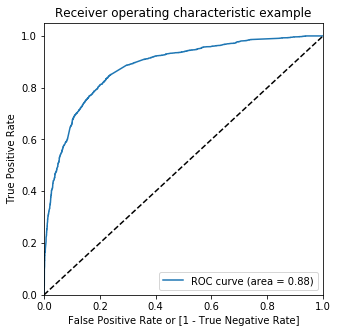

In [253]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

the ROC curve shows the trade-off between True Positive Rate and False Positive Rate which essentially can also be viewed as a tradeoff between Sensitivity and Specificity. As you can see, on the Y-axis, you have the values of Sensitivity and on the X-axis, you have the value of (1 - Specificity). Notice that in the curve when Sensitivity is increasing, (1 - Specificity), And since, (1 - Specificity) is increasing, it simply means that Specificity is decreasing. 

## Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [254]:
# Let's create columns with different probability cutoffs 
numbers = [0.0,0.1,0.2,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Convert_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.35  0.4  \
0          0      0.252194    1871          0    1    1    1    0     0    0   
1          0      0.232852    6795          0    1    1    1    0     0    0   
2          0      0.293180    3516          0    1    1    1    0     0    0   
3          0      0.832752    8105          1    1    1    1    1     1    1   
4          0      0.210298    3934          0    1    1    1    0     0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    1    0  
4    0    0    0    0    0

In [255]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.381262  1.000000  0.000000
0.10  0.10  0.576685  0.970397  0.334083
0.20  0.20  0.738559  0.911598  0.631934
0.30  0.30  0.798701  0.836172  0.775612
0.35  0.35  0.804576  0.800487  0.807096
0.40  0.40  0.811379  0.766829  0.838831
0.50  0.50  0.814935  0.695864  0.888306
0.60  0.60  0.794836  0.583536  0.925037
0.70  0.70  0.780767  0.506488  0.949775
0.80  0.80  0.756339  0.407137  0.971514
0.90  0.90  0.713203  0.266018  0.988756


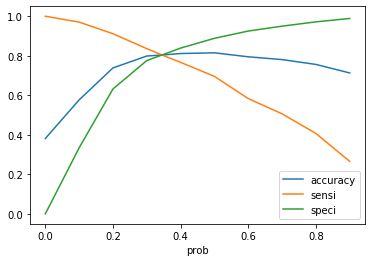

In [256]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [257]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

Converted  Convert_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.35  0.4  \
0          0      0.252194    1871          0    1    1    1    0     0    0   
1          0      0.232852    6795          0    1    1    1    0     0    0   
2          0      0.293180    3516          0    1    1    1    0     0    0   
3          0      0.832752    8105          1    1    1    1    1     1    1   
4          0      0.210298    3934          0    1    1    1    0     0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    1    0                1  
4    0    0    0    0    0                0

In [258]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8045763760049475

In [259]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3230,  772],
       [ 492, 1974]], dtype=int64)

In [260]:
# Predicted     not_churn    churn
# Actual
# not_churn        3230      772
# churn            492       1974

In [261]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [262]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8004866180048662

In [263]:
# Let us calculate specificity
TN / float(TN+FP)

0.8070964517741129

In [264]:
# Calculate false postive rate - predicting Converted when customer does not get Converted
print(FP/ float(TN+FP))

0.19290354822588707


In [265]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7188638018936635


In [266]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8678130037614186


## Precision and Recall

In [267]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3555,  447],
       [ 750, 1716]], dtype=int64)

##### Precision
TP / TP + FP

In [268]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7933425797503467

##### Recall
TP / TP + FN

In [269]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6958637469586375

Using sklearn utilities for the same

In [270]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7933425797503467

In [271]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6958637469586375

### Precision and recall tradeoff

In [272]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [273]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

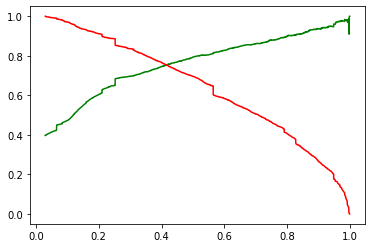

In [274]:
plt.plot(thresholds, p[:-1], "g-")  #precision
plt.plot(thresholds, r[:-1], "r-")  #recall
plt.show()

## Step 11: Making predictions on the test set

In [275]:
X_test.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
4269             0            0          8.0                         1011   
2376             0            0          0.0                            0   
7766             0            0          5.0                           59   
9199             0            0          0.0                            0   
4359             0            0          0.0                            0   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
4269                   8.0       0                  0                   0   
2376                   0.0       0                  0                   0   
7766                   5.0       0                  0                   0   
9199                   0.0       0                  0                   0   
4359                   0.0       0                  0                   0   

      Newspaper  Digital Advertisement  ...  \
4269          0                      0  ...   
2376          0                      0  ...   
7766          0                      0  ...   
9199          0                      0  ...   
4359          0                      0  ...   

      Last Notable Activity_Email Received  \
4269                                     0   
2376                                     0   
7766                                     0   
9199                                     0   
4359                                     0   

      Last Notable Activity_Form Submitted on Website  \
4269                                                0   
2376                                                0   
7766                                                0   
9199                                                0   
4359                                                0   

      Last Notable Activity_Had a Phone Conversation  \
4269                                               0   
2376                                               0   
7766                                               0   
9199                                               0   
4359                                               0   

      Last Notable Activity_Modified  \
4269                               0   
2376                               0   
7766                               0   
9199                               1   
4359                               0   

      Last Notable Activity_Olark Chat Conversation  \
4269                                              0   
2376                                              0   
7766                                              0   
9199                                              0   
4359                                              0   

      Last Notable Activity_Page Visited on Website  \
4269                                              0   
2376                                              0   
7766                                              0   
9199                                              0   
4359                                              0   

      Last Notable Activity_Resubscribed to emails  \
4269                                             0   
2376                                             0   
7766                                             0   
9199                                             0   
4359                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
4269                               1                                  0   
2376                               1                                  0   
7766                               0                                  1   
9199                               0                                  0   
4359                               0                                  0   

      Last Notable Activity_Unsubscribed  
4269                                   0  
2376                                   0  
7766                            

In [276]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [277]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Source_Olark Chat  \
4269             0                     0.964504                       0   
2376             0                    -0.885371                       0   
7766             0                    -0.777416                       0   
9199             0                    -0.885371                       1   
4359             0                    -0.885371                       0   

      Lead Source_Reference  Lead Source_Welingak Website  \
4269                      0                             0   
2376                      1                             0   
7766                      0                             0   
9199                      0                             0   
4359                      1                             0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
4269                                0                            0   
2376                                0                            0   
7766                                0                            0   
9199                                0                            0   
4359                                0                            0   

      Last Activity_Olark Chat Conversation  \
4269                                      0   
2376                                      0   
7766                                      0   
9199                                      1   
4359                                      0   

      Last Activity_Page Visited on Website  \
4269                                      0   
2376                                      0   
7766                                      0   
9199                                      0   
4359                                      0   

      What is your current occupation_Working Professional  \
4269                                                  0      
2376                                                  0      
7766                                                  1      
9199                                                  0      
4359                                                  0      

      Last Notable Activity_Email Link Clicked  \
4269                                         0   
2376                                         0   
7766                                         0   
9199                                         0   
4359                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
4269                                   0                               0   
2376                                   0                               0   
7766                                   0                               0   
9199                                   0                               1   
4359                                   1                               0   

      Last Notable Activity_Olark Chat Conversation  \
4269                                              0   
2376                                              0   
7766                                              0   
9199                                              0   
4359                                              0   

      Last Notable Activity_Page Visited on Website  
4269                                              0  
2376                                              0  
7766                                              0  
9199                                              0  
4359                                              0

In [278]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [279]:
y_test_pred = res.predict(X_test_sm)

In [280]:
y_test_pred[:10]

4269    0.764531
2376    0.948492
7766    0.888877
9199    0.065232
4359    0.827245
9186    0.598372
1631    0.458763
8963    0.165226
8007    0.052667
5324    0.381359
dtype: float64

In [281]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [282]:
# Let's see the head
y_pred_1.head()

0
4269  0.764531
2376  0.948492
7766  0.888877
9199  0.065232
4359  0.827245

In [283]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [284]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [285]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [286]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [287]:
y_pred_final.head()

Converted  CustID         0
0          1    4269  0.764531
1          1    2376  0.948492
2          1    7766  0.888877
3          0    9199  0.065232
4          1    4359  0.827245

In [288]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [289]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Convert_Prob'], axis=1)

In [290]:
# Let's see the head of y_pred_final
y_pred_final.head()

CustID  Converted  Convert_Prob
0    4269          1      0.764531
1    2376          1      0.948492
2    7766          1      0.888877
3    9199          0      0.065232
4    4359          1      0.827245

In [291]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [292]:
y_pred_final.head()

CustID  Converted  Convert_Prob  final_predicted
0    4269          1      0.764531                1
1    2376          1      0.948492                1
2    7766          1      0.888877                1
3    9199          0      0.065232                0
4    4359          1      0.827245                1

In [293]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8095238095238095

In [294]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1369,  308],
       [ 220,  875]], dtype=int64)

In [295]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [296]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7990867579908676

In [297]:
# Let us calculate specificity
TN / float(TN+FP)

0.8163387000596303

In [298]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.7396449704142012

In [299]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7990867579908676

## Observation:
After running the model on the Train and Test data we have these final observations:

##### Train Data: 
- Accuracy: 80.46%
- Sensitivity: 80.05%
- Specificity: 80.71%
- Precision: 79.33%
- Recall: 69.59%

##### Test Data:
- Accuracy: 80.95%
- Sensitivity: 79.91%
- Specificity: 81.63%
- Precision: 73.96%
- Recall: 79.91%

The Model seems to predict the Conversion Rate within our required range and we can give the CEO confidence for making good calls on the basis of this model. 
- While we have checked both Sensitivity, Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- The 'Accuracy', 'Senstivity' and 'Specificity' of both Train and test dataset are almost same.

Higher the Lead Score more better. So we have a table below according to which we can make our choises:

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

Since we got a accuracy of 81.46% on our test dataset, our model seems to be doing good.

## Step 12: Calculating Lead score for the entire dataset

#### Lead Score = 100 * ConversionProbability

In [300]:
# This Lead Score needs to be on original dataset (train+test)

In [301]:
#Test dataset with convertion probability and final predicted value
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

CustID  Converted  Convert_Prob  final_predicted
0    4269          1      0.764531                1
1    2376          1      0.948492                1
2    7766          1      0.888877                1
3    9199          0      0.065232                0
4    4359          1      0.827245                1

In [302]:
#Train dataset with conversion probability and final predicted value
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

Converted  Convert_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.35  0.4  \
0          0      0.252194    1871          0    1    1    1    0     0    0   
1          0      0.232852    6795          0    1    1    1    0     0    0   
2          0      0.293180    3516          0    1    1    1    0     0    0   
3          0      0.832752    8105          1    1    1    1    1     1    1   
4          0      0.210298    3934          0    1    1    1    0     0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    1    0                1  
4    0    0    0    0    0                0

In [303]:
#Dropping unnecessary columns
leads_train_pred = leads_train_pred[['CustID','Converted','Convert_Prob','final_predicted']]
leads_train_pred.head()

CustID  Converted  Convert_Prob  final_predicted
0    1871          0      0.252194                0
1    6795          0      0.232852                0
2    3516          0      0.293180                0
3    8105          0      0.832752                1
4    3934          0      0.210298                0

In [304]:
#Concatenating both the datasets
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

CustID  Converted  Convert_Prob  final_predicted
0    1871          0      0.252194                0
1    6795          0      0.232852                0
2    3516          0      0.293180                0
3    8105          0      0.832752                1
4    3934          0      0.210298                0

In [305]:
#Checking the shape
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6468, 4)
(2772, 4)
(9240, 4)


In [306]:
#Checking CustID is unique or not
len(lead_full_pred['CustID'].unique().tolist())

9240

In [307]:
# Inspecing the max LeadID
lead_full_pred.CustID.max()

9239

In [308]:
#Calculating the lead score
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Convert_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

CustID  Converted  Convert_Prob  final_predicted  Lead_Score
0    1871          0      0.252194                0          25
1    6795          0      0.232852                0          23
2    3516          0      0.293180                0          29
3    8105          0      0.832752                1          83
4    3934          0      0.210298                0          21

In [309]:
#Making CustID index
lead_full_pred = lead_full_pred.set_index('CustID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

Converted  Convert_Prob  final_predicted  Lead_Score
CustID                                                      
0               0      0.116577                0          12
1               0      0.304242                0          30
2               1      0.700138                1          70
3               0      0.143835                0          14
4               1      0.315767                0          32

In [310]:
original_leads = leads2[['Lead Number']]
original_leads.head()

Lead Number
0      660737
1      660728
2      660727
3      660719
4      660681

In [311]:
#Concatenating original dataset and lead full pred dataset
leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head()

Lead Number  Converted  Convert_Prob  final_predicted  Lead_Score
0      660737          0      0.116577                0          12
1      660728          0      0.304242                0          30
2      660727          1      0.700138                1          70
3      660719          0      0.143835                0          14
4      660681          1      0.315767                0          32

In [312]:
#Checkin shape
leads_with_score.shape

(9240, 5)

In [313]:
#Checking for any null values
#calculate % of null values in each columns
def null_values(apl):
    total = apl.isnull().sum().sort_values(ascending = False)
    percent = (apl.isnull().sum()/apl.isnull().count()*100).sort_values(ascending = False)
    missing_inp0  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_inp0

null_values(leads_with_score)

Total  Percent
Lead_Score           0      0.0
final_predicted      0      0.0
Convert_Prob         0      0.0
Converted            0      0.0
Lead Number          0      0.0

## Step 13: Determining Feature Importance

##### Selecting on the basis of coefficients of the selected features from our final model 

In [314]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.16
Total Time Spent on Website                             1.07
Lead Source_Olark Chat                                  1.06
Lead Source_Reference                                   3.71
Lead Source_Welingak Website                            5.57
Last Activity_Converted to Lead                        -1.18
Last Activity_Email Bounced                            -1.18
Last Activity_Olark Chat Conversation                  -1.34
Last Activity_Page Visited on Website                  -0.70
What is your current occupation_Working Professional    2.76
Last Notable Activity_Email Link Clicked               -1.92
Last Notable Activity_Email Opened                     -1.35
Last Notable Activity_Modified                         -1.58
Last Notable Activity_Olark Chat Conversation          -1.32
Last Notable Activity_Page Visited on Website          -0.91
dtype: float64

##### Getting the relative values of coefficients

In [315]:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -20.81
Total Time Spent on Website                             19.17
Lead Source_Olark Chat                                  18.97
Lead Source_Reference                                   66.63
Lead Source_Welingak Website                           100.00
Last Activity_Converted to Lead                        -21.23
Last Activity_Email Bounced                            -21.11
Last Activity_Olark Chat Conversation                  -24.05
Last Activity_Page Visited on Website                  -12.61
What is your current occupation_Working Professional    49.58
Last Notable Activity_Email Link Clicked               -34.40
Last Notable Activity_Email Opened                     -24.19
Last Notable Activity_Modified                         -28.44
Last Notable Activity_Olark Chat Conversation          -23.74
Last Notable Activity_Page Visited on Website          -16.40
dtype: float64

##### Sorting the coefficients

In [316]:
sorted_idx = feature_importance.sort_values(ascending=False)
sorted_idx

Lead Source_Welingak Website                           100.00
Lead Source_Reference                                   66.63
What is your current occupation_Working Professional    49.58
Total Time Spent on Website                             19.17
Lead Source_Olark Chat                                  18.97
Last Activity_Page Visited on Website                  -12.61
Last Notable Activity_Page Visited on Website          -16.40
Do Not Email                                           -20.81
Last Activity_Email Bounced                            -21.11
Last Activity_Converted to Lead                        -21.23
Last Notable Activity_Olark Chat Conversation          -23.74
Last Activity_Olark Chat Conversation                  -24.05
Last Notable Activity_Email Opened                     -24.19
Last Notable Activity_Modified                         -28.44
Last Notable Activity_Email Link Clicked               -34.40
dtype: float64

In [317]:
import_feat = pd.DataFrame(sorted_idx).reset_index()
import_feat.columns = ['Features', 'coefficients']
import_feat.sort_values(by='coefficients',ascending=False).head()

Features  coefficients
0                       Lead Source_Welingak Website        100.00
1                              Lead Source_Reference         66.63
2  What is your current occupation_Working Profes...         49.58
3                        Total Time Spent on Website         19.17
4                             Lead Source_Olark Chat         18.97

## Step 14: Conclusion

The conversion rate will increase with increase in the values of the following features:

| Features | coefficients |
| --- | --- |
| Lead Source_Welingak Website | 100.00 |
| Lead Source_Reference | 66.63 |
| What is your current occupation_Working Professional | 49.58 |
| Total Time Spent on Website | 19.17 |
| Lead Source_Olark Chat | 18.97 |

The conversion rate will increase with decrease in the values of the following features:	

| Features | coefficients |
| --- | --- |
| Last Activity_Page Visited on Website | -12.61 |
| Last Notable Activity_Page Visited on Website | -16.40 |
| Do Not Email | -20.81 |
| Last Activity_Email Bounced | -21.11 |
| Last Activity_Converted to Lead | -21.23 |
| Last Notable Activity_Olark Chat Conversation | -23.74 |
| Last Activity_Olark Chat Conversation | -24.05 |
| Last Notable Activity_Email Opened | -24.19 |
| Last Notable Activity_Modified | -28.44 |
| Last Notable Activity_Email Link Clicked | -34.40 |


##### High Sensitivity means that almost all leads who are likely to Convert are correctly predicted where as high Specificity means that leads that are on the brink of the probability of getting Converted or not are not selected.